Project created on 18th May 2023<br>
Author: 
[Brendan Tan](https://www.linkedin.com/in/brendan-tan/)

# Data Analysis of Movies

![cinema](../images/cinema.jpg)

The film industry has historically experienced fluctuations of both booms and busts. However, with the advent of streaming services like Netflix and Disney+, films and movies are continually gaining popularity and more exposure through such streaming services. The author, hence, chose to explore into data revolving the movie industry.

Similarly, with data and information growing in abundance, the author sees the value of recommender systems appreciating over time. Therefore, this project is aimed at showcasing an applicative example on how recommender systems can be applied to movie and films.

<b>Main goal</b>: This project aims to perform data analysis on film and movie data to achieve the following objectives:

- Analyze and understand the factors that makes a film and movie popular/unpopular
- Recommend a film to users based on their input preferences
- Predict which films will be popular and which will not be

---

This project will mirror the <b>CRoss Industry Standard Process for Data Mining (CRISP-DM)</b> framework, as depicted below:

![CRISP_DM](../images/CRISP_DM.png)

#### <b>1. Business Understanding

The value proposition of this project is in generating value for consumers through enhancing their experiences in an increasingly crowded platform through relevant suggestions to users, or also to improve user engagement by piquing their interests in relevant suggestions. This can in turn drive revenue growth and consumer retention on the platform.

This project will require the following data:<br>
> a. A comprehensive dataset of movie titles, along with movie attributes (such as runtime, year, actors etc) between 2013 to 2023. This was obtained from the [IMDB website](https://developer.imdb.com/non-commercial-datasets/)<br>
>b. A dataset with revenues of movies earned (scrapped)<br>
>c. A matrix of user ratings for each movie (scrapped)<br>
    
#### <b>2. Data Understanding




#### <b>3. Data Preparation




#### <b>4. Modelling

The recommender engine here will leverage on several features, such as location (country), genre, commonalities in actors/directors, to create context aware recommendations.


#### <b>5. Evaluation

Accuracy metrics (F1, precision, recall) 


#### <b>6. Deployment

This project will be deployed via streamlit and hosted on a local machine.



## Table of Contents

## Importing Packages

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import missingno as msno
import os
import requests
from bs4 import BeautifulSoup
import random

from sklearn.utils import shuffle

from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from keras.layers import Dropout, BatchNormalization, Activation
from keras.regularizers import l2
from keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import MultiLabelBinarizer

from scipy.sparse import load_npz, csr_matrix

import sqlite3
from sqlalchemy import create_engine, MetaData, Table


from helper import *


pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns', None)

## Data Understanding

1. Collect Initial Data
2. Describe Data
3. Explore Data
4. Verify data quality


The following diagrams shows the fact sheets and data table for the datasets used for this project.


Fact table:
![fact_table](../images/fact_table.png)

Data dictionary:

| **Feature**       | **Type**     | **Description**                                                                                            | **Dataset**      |
|-------------------|--------------|------------------------------------------------------------------------------------------------------------|------------------|
| tconst            | string       | alphanumeric unique identifier of the title                                                                | title_basics     |
| titleType         | string       | the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)                          | title_basics     |
| primaryTitle      | string       | the more popular title / the title used by the filmmakers on promotional materials at the point of release | title_basics     |
| originalTitle     | string       | original title, in the original language                                                                   | title_basics     |
| isAdult           | boolean      | 0: non-adult title; 1: adult title                                                                         | title_basics     |
| startYear         | integer      | represents the release year of a title. In the case of TV Series, it is the series start year              | title_basics     |
| endYear           | integer      | TV Series end year. ‘\N’ for all other title types                                                         | title_basics     |
| runtimeMinutes    | integer      | primary runtime of the title, in minutes                                                                   | title_basics     |
| genres            | string array | includes up to three genres associated with the title                                                      | title_basics     |
| directors         | string array | director(s) of the given title                                                                             | title_crew       |
| writers           | string array | writer(s) of the given title                                                                               | title_crew       |
| ordering          | integer      | a number to uniquely identify rows for a given titleId                                                     | title_principals |
| nconst            | string       | alphanumeric unique identifier of the name/person                                                          | title_principals |
| category          | string       | the category of job that person was in                                                                     | title_principals |
| job               | string       | the specific job title if applicable, else '\N'                                                            | title_principals |
| characters        | string       | the name of the character played if applicable, else '\N'                                                  | title_principals |
| nconst            | string       | alphanumeric unique identifier of the name/person                                                          | name_basics      |
| primaryName       | string       | name by which the person is most often credited                                                            | name_basics      |
| birthYear         | integer      | in YYYY format                                                                                             | name_basics      |
| deathYear         | integer      | in YYYY format if applicable, else '\N'                                                                    | name_basics      |
| primaryProfession | string array | the top-3 professions of the person                                                                        | name_basics      |
| knownForTitles    | string array | titles the person is known for                                                                             | name_basics      |
| averageRating     | float        | weighted average of all the individual user ratings                                                        | title_ratings    |
| numVotes          | integer      | number of votes the title has received                                                                     | title_ratings    |
| titleType         | string       | the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)                          | title_akas       |
| primaryTitle      | string       | the more popular title / the title used by the filmmakers on promotional materials at the point of release | title_akas       |
| originalTitle     | string       | original title, in the original language                                                                   | title_akas       |
| isAdult           | boolean      | 0: non-adult title; 1: adult title                                                                         | title_akas       |
| startYear         | integer      | represents the release year of a title. In the case of TV Series, it is the series start year              | title_akas       |
| endYear           | integer      | TV Series end year. ‘\N’ for all other title types                                                         | title_akas       |
| runtimeMinutes    | integer      | primary runtime of the title, in minutes                                                                   | title_akas       |
| worldwide_revenue | float        | worldwide revenue earned (0 if no info)                                                                    | df_revenue       |
| reviews           | tuple array  | an array of user_id and user rating tuples                                                                 | df_reviews       |


<br>


To merge all cast into dictionary

In [45]:
# #Data Cleaning


# name_basics = name_basics.replace('\\N', 'N/A')
# name_basics = name_basics.fillna('N/A')
# name_basics = name_basics.astype('string')

# title_basics = title_basics.replace('\\N', 'N/A')
# title_basics = title_basics.fillna('N/A')
# title_basics = title_basics.astype('string')

# title_akas = title_akas.replace('\\N', 'N/A')
# title_akas = title_akas.fillna('N/A')
# title_akas = title_akas.astype('string')

# title_crew = title_crew.replace('\\N', 'N/A')
# title_crew = title_crew.fillna('N/A')
# title_crew = title_crew.astype('string')

# title_principals = title_principals.replace('\\N', 'N/A')
# title_principals = title_principals.fillna('N/A')
# title_principals = title_principals.astype('string')

# title_ratings = title_ratings.replace('\\N', 'N/A')
# title_ratings = title_ratings.fillna('N/A')
# title_ratings = title_ratings.astype('string')


In [46]:
# con = connect()


In [47]:
# #Saving cleaned data to database

# name_basics.to_sql(name="name_basics", con = con, if_exists='replace', index=False, \
#                    dtype={'nconst': 'text', 'primaryName':'text', 'birthYear':'integer', \
#                          'deathYear':'integer', 'primaryProfession':'text', 'knownforTitles':'text'})

# title_akas.to_sql(name="title_akas", con = con, if_exists='replace', index=False, \
#                    dtype={'titleId': 'text', 'ordering':'integer', 'title':'text', \
#                          'region':'text', 'language':'text', 'types':'text',\
#                          'attributes':'text', 'isOriginalTitle':'blob'})

# title_basics.to_sql(name="title_basics", con = con, if_exists='replace', index=False, \
#                    dtype={'tconst': 'text', 'titleType':'text', 'primaryTitle':'text', \
#                          'originalTitle':'text', 'isAdult':'blob', 'startYear':'integer',\
#                          'endYear':'integer', 'runtimeMinutes':'integer','genres':'text'})

# title_crew.to_sql(name="title_crew", con = con, if_exists='replace', index=False, \
#                    dtype={'tconst': 'text', 'directors':'text', 'writers':'text'})

# title_episode.to_sql(name="title_episode", con = con, if_exists='replace', index=False, \
#                    dtype={'tconst': 'text', 'parentTconst':'text', 'seasonNumber':'integer',\
#                          'episodeNumber':'integer'})

# title_principals.to_sql(name="title_principals", con = con, if_exists='replace', index=False, \
#                    dtype={'tconst': 'text', 'ordering':'integer', 'nconst':'text',\
#                          'category':'text','job':'text','characters':'text'})

# title_ratings.to_sql(name="title_ratings", con = con, if_exists='replace', index=False, \
#                    dtype={'tconst': 'text', 'averageRating':'real', 'numVotes':'integer'})


In [48]:
# con.commit()
# con.close()

In [49]:
# # Merging title_akas and title_basics to form title_df
# subset_title_akas = pl.from_pandas(subset_title_akas)
# title_basics = pl.from_pandas(title_basics)


# print(f"title_akas shape: {subset_title_akas.shape}")
# print(f"title_basics shape: {title_basics.shape}")

# title_df = subset_title_akas.join(title_basics, left_on='titleId', right_on = 'tconst',how='left')

# print(f"title_df shape: {title_df.shape}")
# print("="*80)


# # Merging title_df with title_crew_data
# title_crew = pl.from_pandas(title_crew)

# print(f"title_crew shape: {title_crew.shape}")
# title_df = title_df.join(title_crew, left_on='titleId',right_on='tconst', how='left')
# print(f"After merging with title_crew, title_df shape is {title_df.shape}")
# print("="*80)


# # Merging title_df with title_episode
# title_episode = pl.from_pandas(title_episode)

# print(f"title_episode shape: {title_episode.shape}")
# title_df = title_df.join(title_episode, left_on='titleId',right_on='parentTconst', how='outer')
# print(f"After merging with title_episode, title_df shape is {title_df.shape}")
# print("="*80)

In [50]:
# #Merging title_df with title_principals
# print(f"title_principals shape: {title_principals.shape}")
# title_df = title_df.merge(title_episode, how='outer', left_on = 'titleId', right_on='parentTconst')
# print(f"After merging with title_episode, title_df shape is {title_df.shape}")
# print("="*80)

### Data Cleaning

In [51]:
df = pd.read_parquet('../data/movies2013-2023.parquet')
ratings = pd.read_parquet('../data/df_ratings_expanded.parquet')

In [52]:
#Setting missing values to np.nan

df['worldwide_revenue'] = df['worldwide_revenue'].replace(0, np.nan)
df[['directors','writers']] = df[['directors','writers']].replace('\\N',np.nan)

In [53]:
print(f"Original dataframe length: {len(df)}")

Original dataframe length: 162885


<AxesSubplot:>

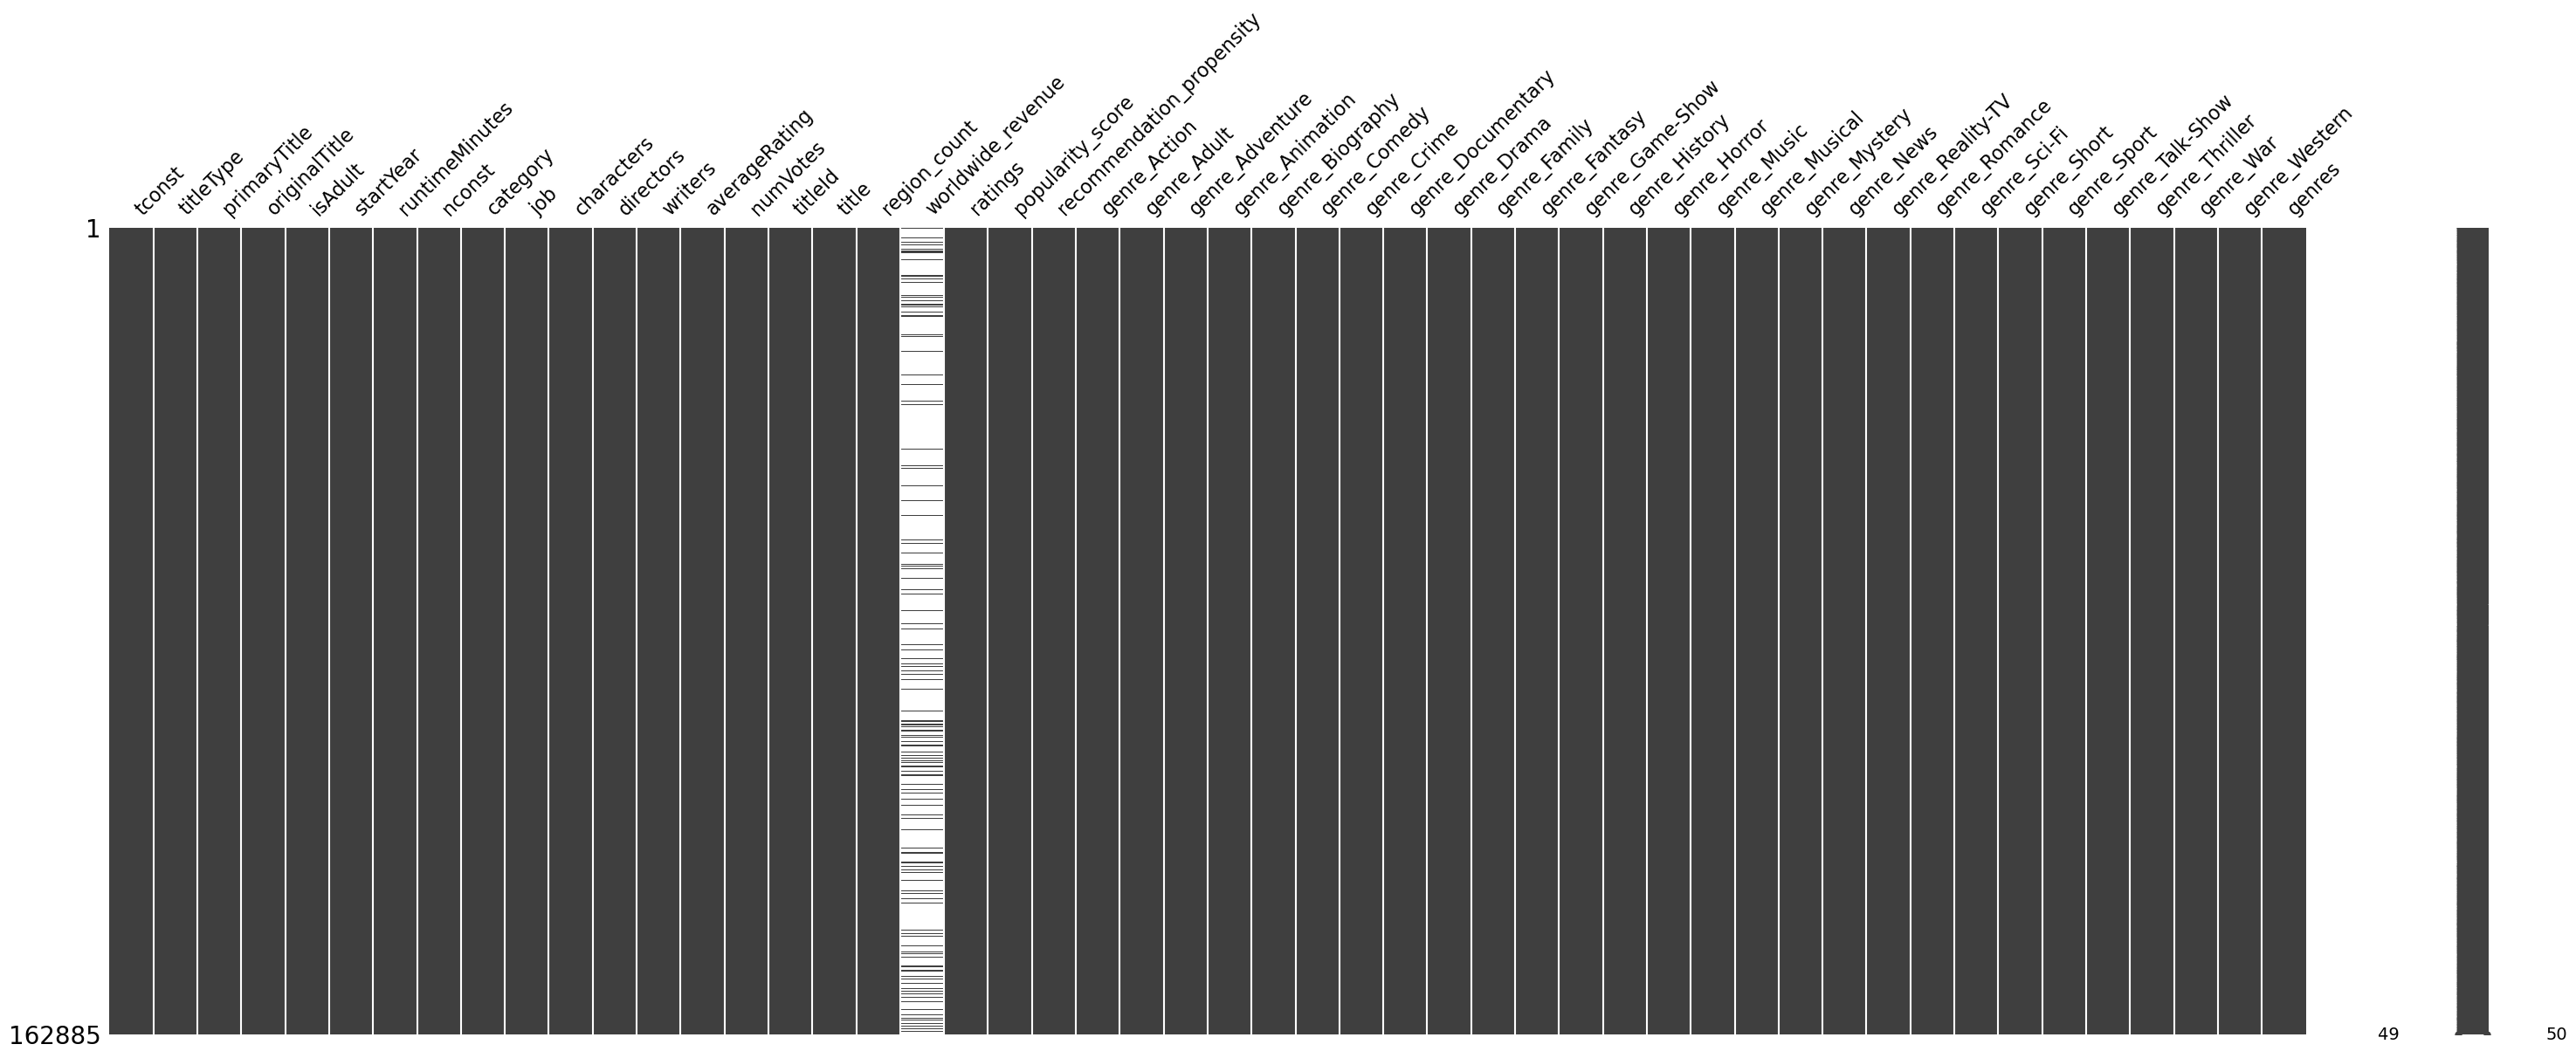

In [54]:
msno.matrix(df, figsize=(36,12))

We will drop the following rows as they are not as important to the analysis and building of recommender model:
1. writers
2. titleId
3. title

We will eventually drop worldwide_revenue and ratings, since there is too significant a proportion of missing values. However, for the purpose of EDA, we retain these values temporarily

We will impute the averageRating and numVotes column with the column mean, as the recommender algorithm scores the selection based on the distance from the mean.

Finally, we will impute region_count as 1, and assume that the film is only aired in the country of production


In [55]:
#Dropping rows with null nconst
df.dropna(subset=['nconst', 'directors'],inplace=True)


In [56]:
print(f"Current dataframe length: {len(df)}")

Current dataframe length: 162885


##### Data Cleaning

In [57]:
#OHE genre column

df['genres'] = df['genres'].str.split(';')

mlb = MultiLabelBinarizer()

genre_ohe = pd.DataFrame(mlb.fit_transform(df['genres']),columns=[f"genres_{col}" for col in mlb.classes_], index=df.index)

df = pd.concat([df, genre_ohe], axis=1)
df.drop(columns=['genres'],inplace=True)

#Imputing missing values for averageRating, numVotes and region_count
df['averageRating'] = SimpleImputer(strategy='mean', missing_values=np.nan).fit_transform(df[['averageRating']])
df['numVotes'] = SimpleImputer(strategy='mean', missing_values=np.nan).fit_transform(df[['numVotes']])
df['region_count'] = df['region_count'].fillna(1)


#Dropping writers, titleId and title
df = df.drop(columns=['titleId','title','writers'])


#Subsetting out dataframe with revenue and ratings columns available, and then dropping the columns from main dataframe

revenue = df[~df['worldwide_revenue'].isna()].copy()



#assuming an average inflation rate of 3% every year

def adjust_for_inflation(df, inflation_rate = 0.03):
    base_year = min(df['startYear'])
    df['adjusted_revenue'] = df.apply(lambda row: row['worldwide_revenue'] * (1 + inflation_rate) ** (base_year - row['startYear']), axis=1)
    return df


revenue = adjust_for_inflation(revenue)

In [58]:
revenue

tconst titleType                 primaryTitle  \
1       tt0013274     movie  Istoriya grazhdanskoy voyny   
5       tt0100275     movie     The Wandering Soap Opera   
27      tt0293429     movie                Mortal Kombat   
32      tt0315642     movie                        Wazir   
37      tt0331314     movie              Bunyan and Babe   
...           ...       ...                          ...   
162872  tt9914942     movie       Life Without Sara Amat   
162873  tt9914972     movie               Blind Ambition   
162876  tt9915872     movie         The Last White Witch   
162883  tt9916362     movie                        Coven   
162884  tt9916428     movie          The Secret of China   

                       originalTitle  isAdult  startYear  runtimeMinutes  \
1        Istoriya grazhdanskoy voyny        0       2021       94.000000   
5              La Telenovela Errante        0       2017       80.000000   
27                     Mortal Kombat        0       2021      110.000000   
32                             Wazir        0       2016      103.000000   
37                   Bunyan and Babe        0       2017       84.000000   
...                              ...      ...        ...             ...   
162872    La vida sense la Sara Amat        0       2019       74.000000   
162873                Blind Ambition        0       2021       96.000000   
162876     My Girlfriend is a Wizard        0       2019       97.000000   
162883                      Akelarre        0       2020       92.000000   
162884  Hong xing zhao yao Zhong guo        0       2019       97.684611   

                                                   nconst  \
1                          nm0412842;nm0895048;nm13054604   
5       nm0005948;nm0016013;nm0728971;nm0721280;nm1415...   
27      nm0864880;nm1167985;nm2537621;nm0493257;nm3029...   
32      nm3871075;nm0000821;nm1027719;nm2390814;nm1303...   
37      nm1356349;nm0000422;nm0289344;nm0001288;nm2259...   
...                                                   ...   
162872  nm0739828;nm10823679;nm10814833;nm1412926;nm34...   
162873  nm5293094;nm0743916;nm5292318;nm6760227;nm4407...   
162876            nm0755725;nm4392634;nm8063415;nm2507310   
162883  nm5813626;nm3766704;nm0107165;nm0266723;nm1067...   
162884  nm3611859;nm9445072;nm8594703;nm0422639;nm0910...   

                                                 category  \
1                              director;director;producer   
5       composer;actor;actress;actor;actress;director;...   
27      writer;actor;actress;actor;actor;director;writ...   
32      writer;actor;actor;actress;actor;director;writ...   
37      composer;actor;actor;actor;actor;director;writ...   
...                                                   ...   
162872  editor;actor;actress;actress;actress;director;...   
162873  director;director;writer;writer;composer;cinem...   
162876                    actress;actress;director;writer   
162883  composer;actress;actor;actor;actress;director;...   
162884     actor;actor;actor;actress;director;actor;actor   

                                                      job  \
1                                          \N;\N;producer   
5       \N;\N;\N;\N;\N;original director;completion di...   
27      based on the videogame created by;\N;\N;\N;\N;...   
32      dialogue;\N;\N;\N;\N;\N;story;screenplay;scree...   
37      \N;\N;\N;\N;\N;\N;screenplay by;screenplay by;...   
...                                                   ...   
162872                   \N;\N;\N;\N;\N;\N;\N;novel;\N;\N   
162873                                  \N;\N;\N;\N;\N;\N   
162876                                    \N;\N;\N;writer   
162883  \N;\N;\N;\N;\N;\N;screenplay by;executive prod...   
162884                               \N;\N;\N;\N;\N;\N;\N   

                                               characters  \
1                                                \N;\N;\N   
5       \N;["Belisario - Homero - Mateo"];["Waitress -..

In [59]:
df.isna().sum()

tconst                            0
titleType                         0
primaryTitle                      0
originalTitle                     0
isAdult                           0
startYear                         0
runtimeMinutes                    0
nconst                            0
category                          0
job                               0
characters                        0
directors                         0
averageRating                     0
numVotes                          0
region_count                      0
worldwide_revenue            141292
ratings                           0
popularity_score                  0
recommendation_propensity         0
genre_Action                      0
genre_Adult                       0
genre_Adventure                   0
genre_Animation                   0
genre_Biography                   0
genre_Comedy                      0
genre_Crime                       0
genre_Documentary                 0
genre_Drama                 

<br>We will use the iMDB formula of calculating the popularity of a given movie (min 1000 votes):<br><br>
popularity_score = (v / (v + m)) * R + (m / (v + m)) * C<br>

where v = number of votes of the movie, <br>
R is the average rating, <br>
m is the minumum votes required for the movie to be considered <br>
C is the mean rating across all movies<br><br>

We will also calculate a recommendation propensity score, by adjusting the popularity score to have a time decaying element. In other words, the older the movie, the less likely to be recommended.<br><br>

recommendation_propensity = popularity_score - k* age/10, where k = constant (determined from max popularity score value)

In [60]:
m = 1000
C = df['averageRating'].mean()

def weighted_rating(row):
    v = row['numVotes']
    R = row['averageRating']
    return (v / (v + m)) * R + (m / (v + m)) * C

df['popularity_score'] = df.apply(weighted_rating, axis=1)


df['recommendation_propensity'] = df['popularity_score'] - (10 * ((2023 - df['startYear'])/10))
df['recommendation_propensity']

0         2.276738
1         4.304487
2         3.294918
3         1.651260
4         5.276738
            ...   
162880    0.276738
162881    2.774669
162882    2.997081
162883    3.380552
162884    2.242543
Name: recommendation_propensity, Length: 162885, dtype: float64

In [61]:
#To verify that the popularity_score and recommendation_propensity formulas are working as intended:
df[['tconst','numVotes','startYear','averageRating','popularity_score','recommendation_propensity']].sort_values('recommendation_propensity', ascending=False)

tconst  numVotes  startYear  averageRating  popularity_score  \
73432   tt26235412    3521.0       2023            9.1          8.475523   
3281    tt10351180    8306.0       2023            8.7          8.439602   
66001   tt22207772    1761.0       2023            9.6          8.396356   
72577   tt25502544    1333.0       2023            9.9          8.346952   
155234   tt9006564    2874.0       2023            9.0          8.297041   
...            ...       ...        ...            ...               ...   
100261   tt4458206   27605.0       2015            1.7          1.859998   
106050   tt4884540   42909.0       2015            1.7          1.804232   
72829    tt2574698   59606.0       2014            2.6          2.660666   
81788    tt3036740    8441.0       2014            1.7          2.184773   
93926    tt4009460   16380.0       2014            1.3          1.586349   

        recommendation_propensity  
73432                    8.475523  
3281                     8.439602  
66001                    8.396356  
72577                    8.346952  
155234                   8.297041  
...                           ...  
100261                  -6.140002  
106050                  -6.195768  
72829                   -6.339334  
81788                   -6.815227  
93926                   -7.413651  

[162885 rows x 6 columns]

<AxesSubplot:xlabel='startYear', ylabel='recommendation_propensity'>

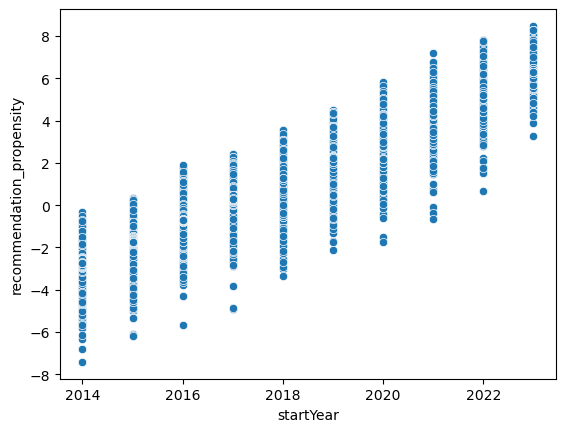

In [62]:
sns.scatterplot(data=df, x='startYear',y='recommendation_propensity')

<AxesSubplot:xlabel='averageRating', ylabel='popularity_score'>

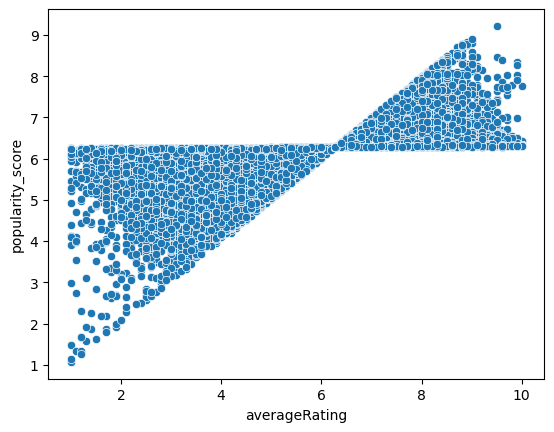

In [63]:
sns.scatterplot(data=df, x='averageRating',y='popularity_score')

<AxesSubplot:xlabel='popularity_score', ylabel='recommendation_propensity'>

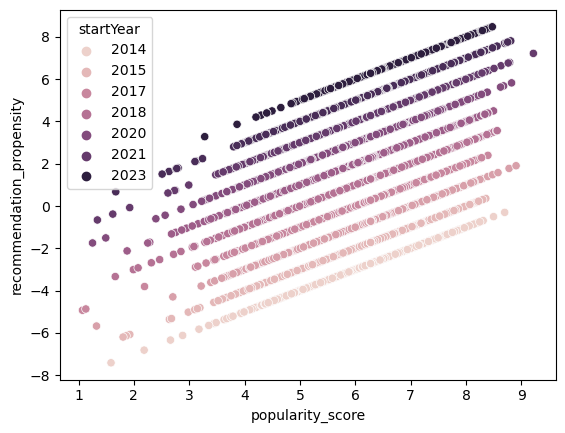

In [64]:
sns.scatterplot(data=df, x='popularity_score', y='recommendation_propensity', hue='startYear')

The above 3 visualizations show that movies with higher popularity score and more recent are more likely to be recommended, which fulfils the intent of the recommendation propensity algorithm.

### EDA

Some questions to answer (and showcase on streamlit dashboard):
1. Overall popularity climate of movies in the past 10 years
2. What types of films are most popular?
3. What genre of films yields the highest revenues?
4. Which directors have been involved in popular films overall?

In [65]:
df.head()

tconst titleType                                       primaryTitle  \
0  tt0011801     movie                                   Tötet nicht mehr   
1  tt0013274     movie                        Istoriya grazhdanskoy voyny   
2  tt0062336     movie  The Tango of the Widower and Its Distorting Mi...   
3  tt0069049     movie                         The Other Side of the Wind   
4  tt0077684     movie                  Histórias de Combóios em Portugal   

                               originalTitle  isAdult  startYear  \
0                           Tötet nicht mehr        0       2019   
1                Istoriya grazhdanskoy voyny        0       2021   
2  El tango del viudo y su espejo deformante        0       2020   
3                 The Other Side of the Wind        0       2018   
4          Histórias de Combóios em Portugal        0       2022   

   runtimeMinutes                                             nconst  \
0       97.684611  nm0459029;nm0681726;nm0692612;nm0726256;nm0776...   
1       94.000000                     nm0412842;nm0895048;nm13054604   
2       70.000000  nm0093680;nm0815612;nm1860495;nm0016013;nm0739...   
3      122.000000  nm0613657;nm0001379;nm0462648;nm0000953;nm0001...   
4       46.000000                                          nm0127908   

                                            category  \
0  actor;actor;actress;actor;actor;writer;cinemat...   
1                         director;director;producer   
2  cinematographer;actor;actress;actor;actress;di...   
3  editor;actor;actress;actor;actress;director;pr...   
4                                           director   

                                                 job  \
0                      \N;\N;\N;\N;\N;\N;\N;\N;\N;\N   
1                                     \N;\N;producer   
2  \N;\N;\N;\N;\N;original director;completion di...   
3          \N;\N;\N;\N;\N;\N;producer;producer;\N;\N   
4                                                NIL   

                                          characters            directors  \
0  ["Impresario Costi Theater"];["Musiker Erik Pa...            nm0681726   
1                                           \N;\N;\N  nm0412842;nm0895048   
2  \N;["Viudo"];["Fantasma"];["Silva"];["Lola"];\...  nm0749914;nm0765384   
3  \N;["Jake Hannaford"];["The Actress"];["Brooks...            nm0000080   
4                                                NIL            nm0127908   

   averageRating     numVotes region_count  worldwide_revenue  \
0       6.276738  3207.679808            3                NaN   
1       6.800000    56.000000            7            16622.0   
2       6.400000   173.000000           10                NaN   
3       6.700000  7684.000000           24                NaN   
4       6.276738  3207.679808            4                NaN   

                                             ratings  popularity_score  \
0                                                 []          6.276738   
1                                                 []          6.304487   
2                                                 []          6.294918   
3  [('ur0011762', '7'), ('ur3564718', '8'), ('ur0...          6.651260   
4                                                 []          6.276738   

   recommendation_propensity  genre_Action  genre_Adult  genre_Adventure  \
0                   2.276738             1            0                0   
1                   4.304487             0            0                0   
2                   3.294918             0            0                0   
3                   1.651260             0            0                0   
4                   5.276738             0            0                0   

   genre_Animation  genre_Biography  genre_Comedy  genre_Crime  \
0                0                0             0            0   
1                0                0             0            0   
2                0                0             0            0   
3      

In [66]:
df['startYear'] = df['startYear'].astype('category')
df['region_count'] = df['region_count'].replace('NIL',0.0).astype('float')

In [67]:
#Grouping by year of movie
gbyear = df.groupby('startYear').agg({'runtimeMinutes':'mean','averageRating':'mean', 'numVotes':'mean', 'region_count':'mean', 'popularity_score':'mean'})
gbyear

runtimeMinutes  averageRating     numVotes  region_count  \
startYear                                                             
2014            88.012789       6.282447  4149.641424      4.148602   
2015            89.309256       6.263079  3507.090846      4.144406   
2016            89.286981       6.266933  3572.705296      4.213441   
2017            89.920008       6.254562  3289.857624      4.365738   
2018            90.811567       6.216520  3129.554526      4.595324   
2019            97.929422       6.219956  3192.685150      5.011252   
2020            92.111965       6.227576  2556.227806      4.858764   
2021            89.778954       6.270565  2970.554350      5.129036   
2022            92.999281       6.393786  2823.780128      4.812970   
2023            92.528781       6.450396  2661.476122      2.785041   

           popularity_score  
startYear                    
2014               6.245634  
2015               6.242182  
2016               6.244217  
2017               6.242363  
2018               6.241280  
2019               6.241392  
2020               6.233860  
2021               6.247336  
2022               6.264993  
2023               6.290926

Movies are generally getting longer, and are getting aired in increasing number of regions

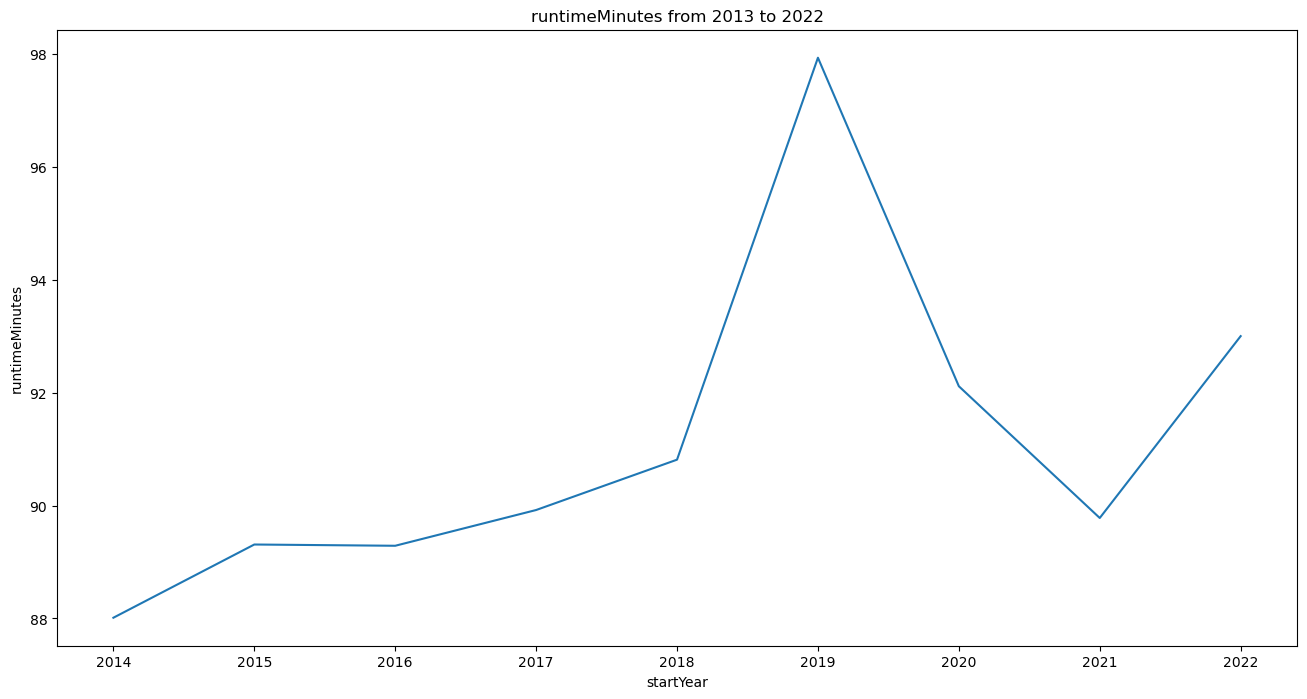

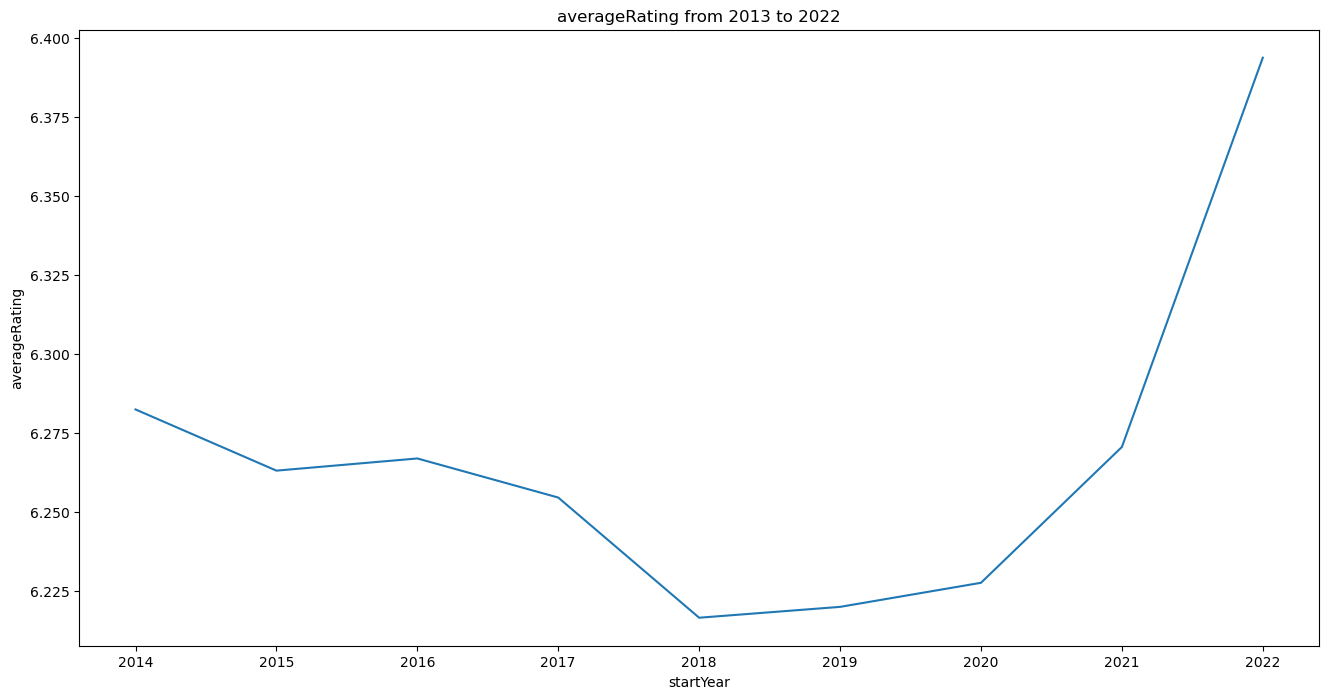

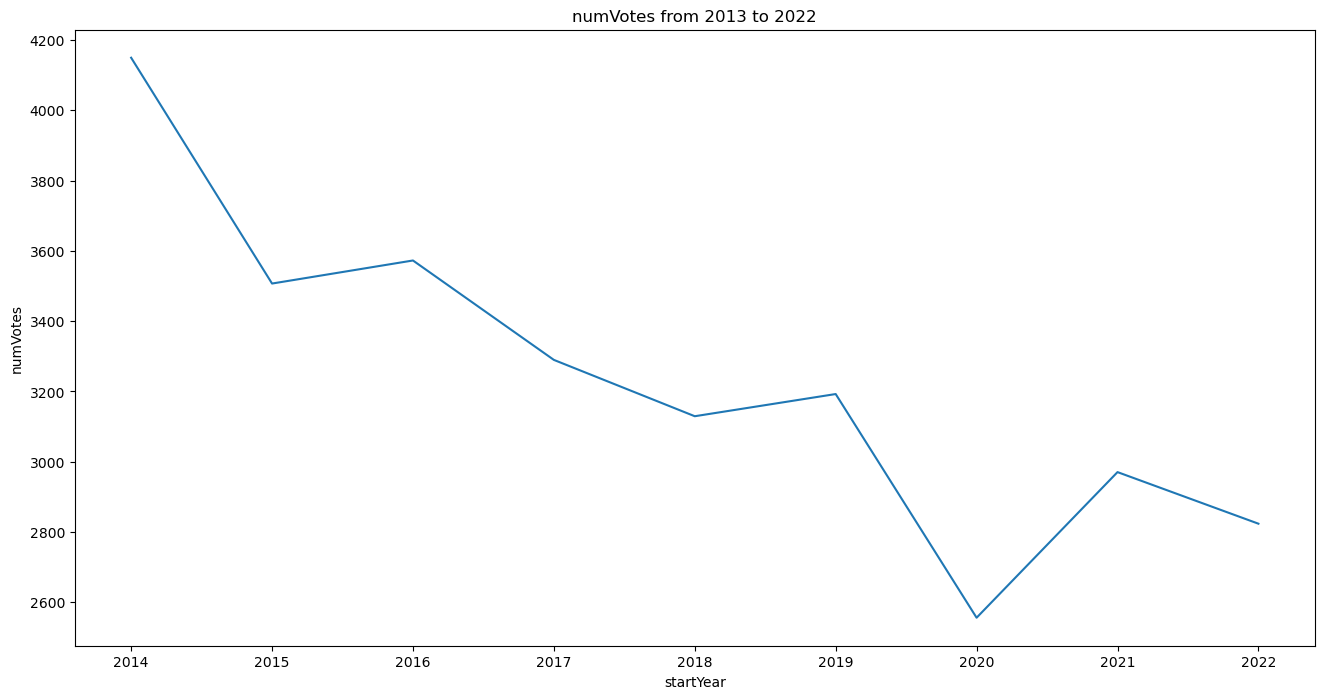

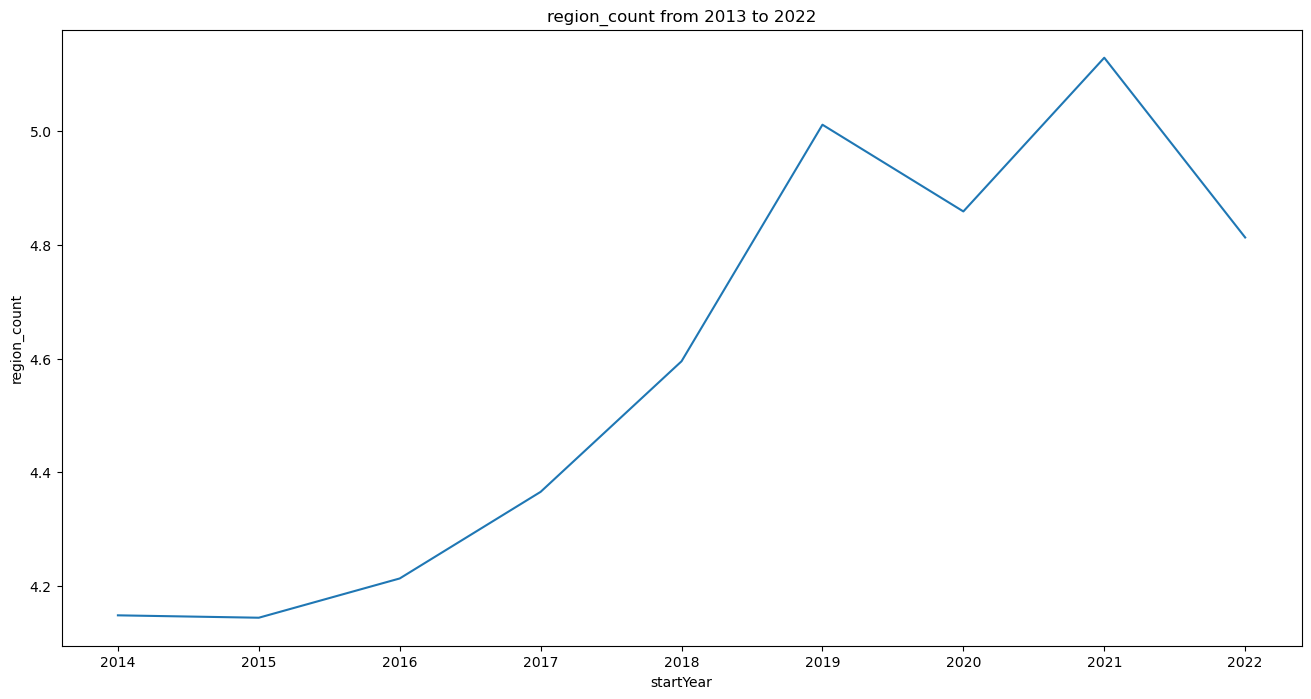

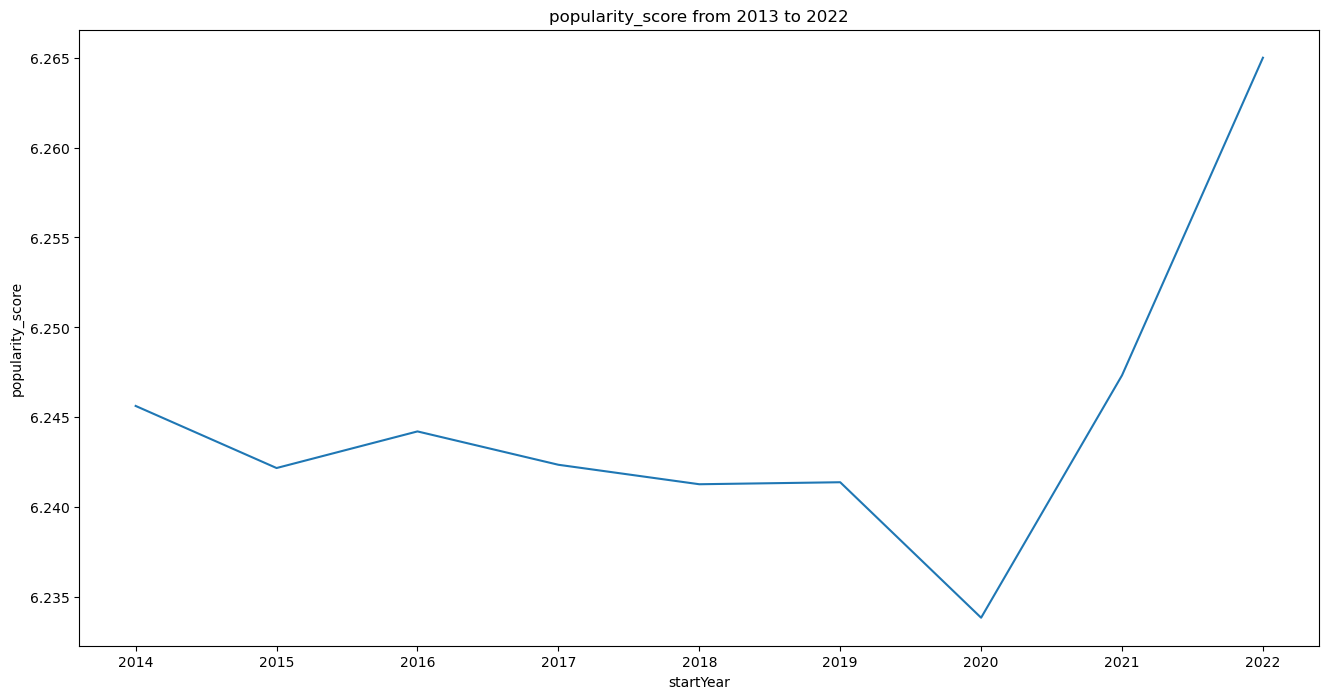

In [68]:
for col in gbyear.columns:
    gbyear_2022 = gbyear.loc[:2022, :] #we truncate the results at 2022, because data for 2023 has not been fully collected given we are only in July 2023 as of writing of this code
    plt.figure(figsize=(16,8))
    sns.lineplot(data=gbyear_2022, x=gbyear_2022.index, y=col)
    plt.title(f'{col} from 2013 to 2022')
    plt.show()

From the graphs above, we can generally conclude that:
1. Average rating and popularity of movies generally increased over time
2. Movies become increasingly globalized as more movies become available for screening in more regions outside of the country of production. This could be due to the advent of streaming platforms such as Netflix, Hulu, Disney+ etc
3. Lesser people have been voting on imdb, possibly also because viewers switched to voting on the streaming platforms instead.

---

In [69]:
#Types of films with highest ratings

#By genre
genre_cols = [col for col in df.columns if col.startswith('genres')]
len(genre_cols)

27

In [70]:
#Creating a dataframe to view average popularity
genre_pop_scores = []

for genre in genre_cols:
    genre_pop_score = df.groupby(genre)['popularity_score'].mean()[1]
    genre_pop_scores.append(genre_pop_score)
    


In [71]:
genre_pop_scores_df = pd.DataFrame({'Genre':genre_cols, 'Pop_scores':genre_pop_scores})

In [72]:
genre_pop_scores_df.sort_values('Pop_scores',ascending=False)

Genre  Pop_scores
4     genres_Biography    6.371275
17         genres_News    6.335978
12      genres_History    6.335321
14        genres_Music    6.324696
22        genres_Sport    6.323220
7   genres_Documentary    6.308009
3     genres_Animation    6.301331
25          genres_War    6.287265
23    genres_Talk-Show    6.279754
15      genres_Musical    6.277983
11    genres_Game-Show    6.276738
21        genres_Short    6.276738
1         genres_Adult    6.275354
18   genres_Reality-TV    6.271393
8         genres_Drama    6.268863
9        genres_Family    6.239154
19      genres_Romance    6.233878
6         genres_Crime    6.223494
2     genres_Adventure    6.199505
5        genres_Comedy    6.198669
10      genres_Fantasy    6.173183
26      genres_Western    6.171894
0        genres_Action    6.148057
16      genres_Mystery    6.126568
24     genres_Thriller    6.115826
20       genres_Sci-Fi    6.068766
13       genres_Horror    6.025005

Considering the past 10 years, genres like biographies, news, history and sports have been generally most popular

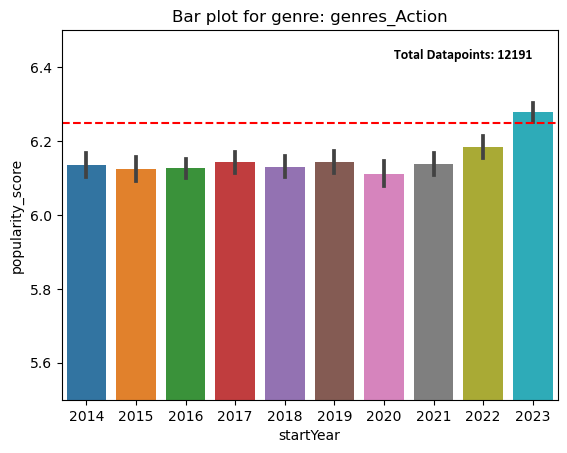

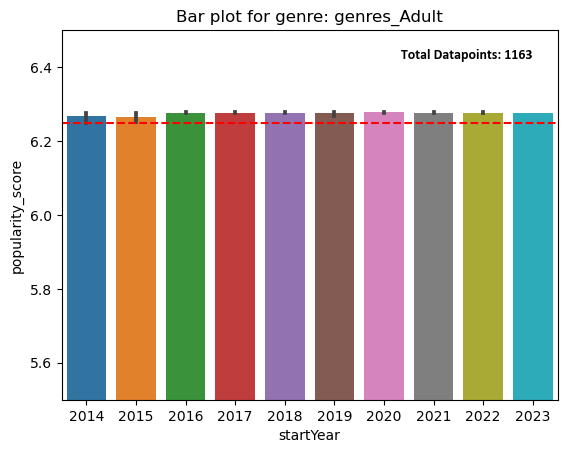

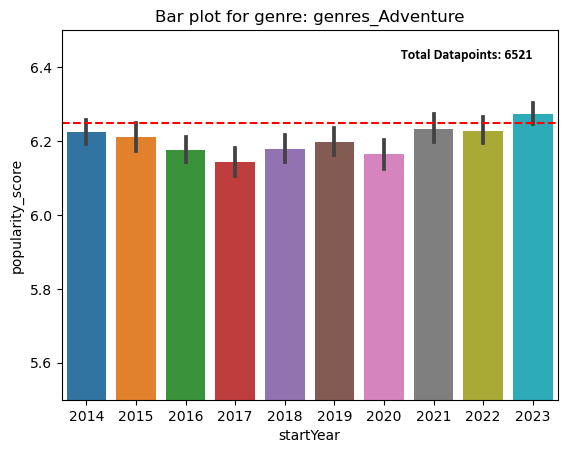

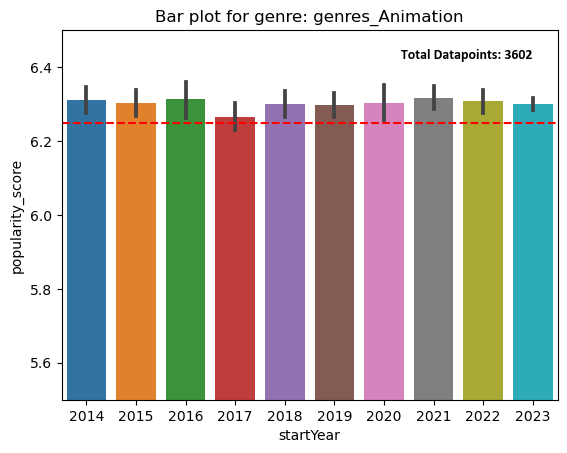

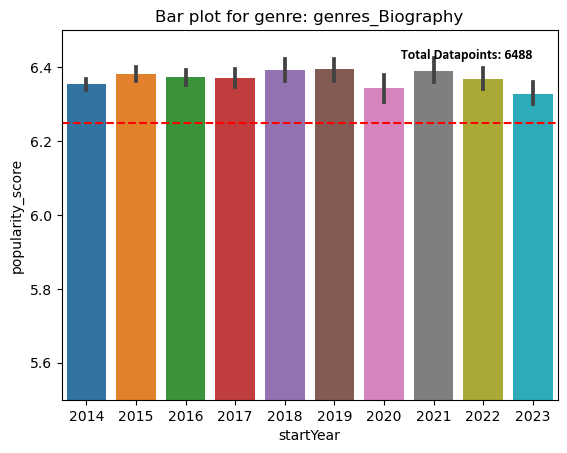

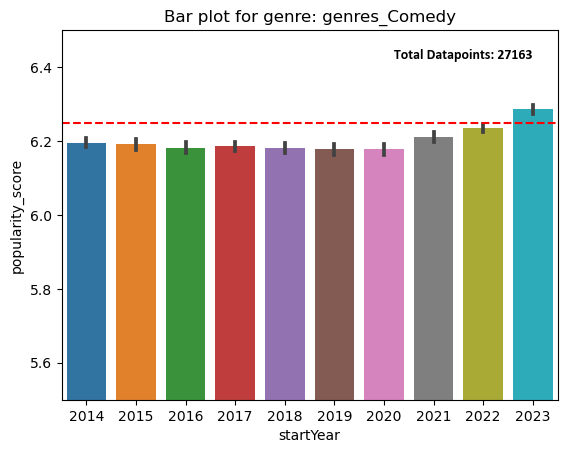

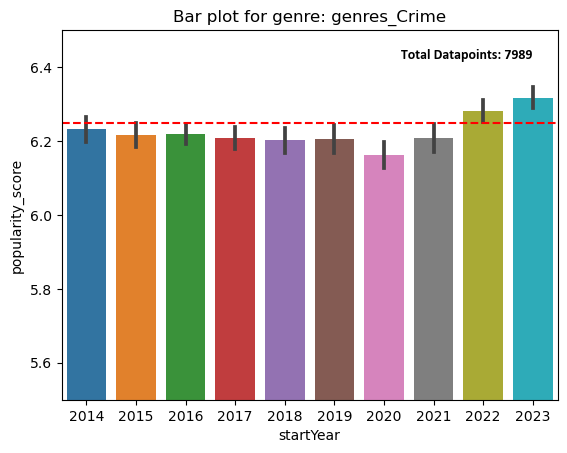

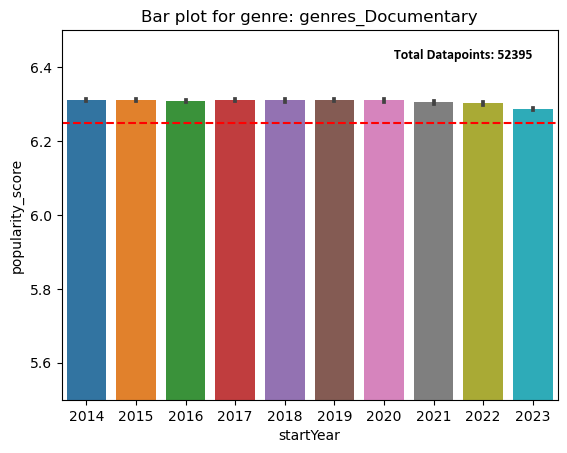

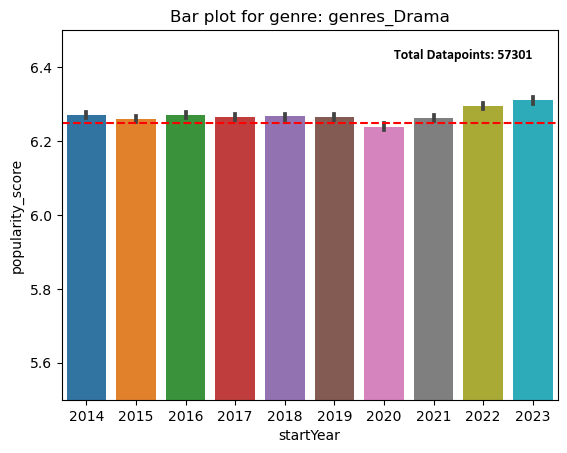

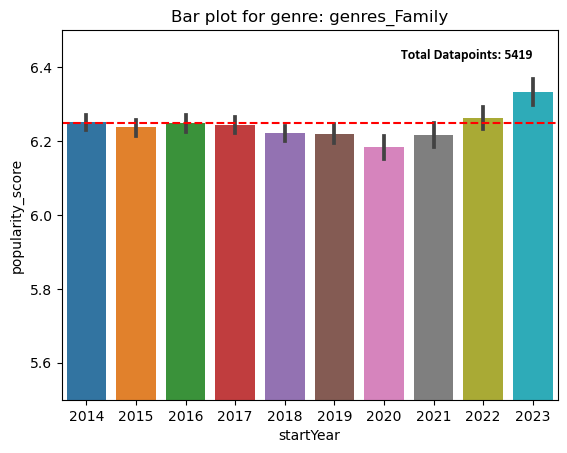

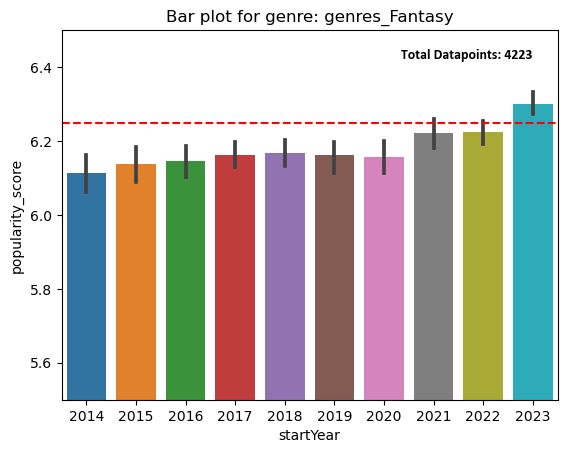

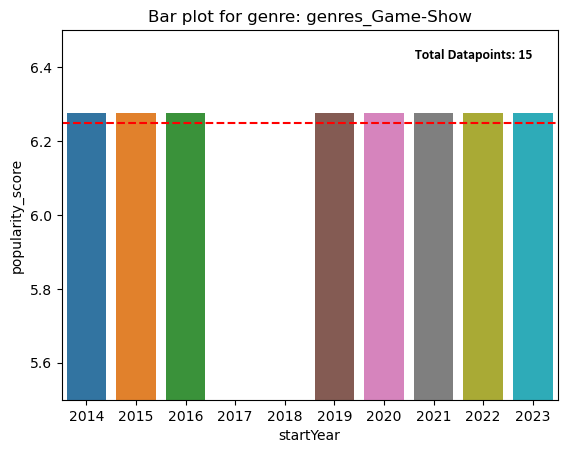

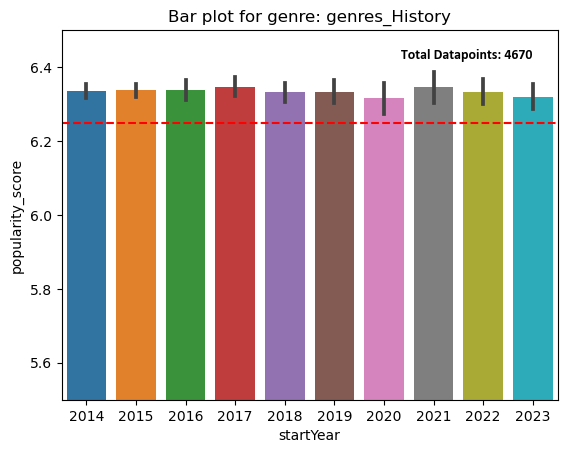

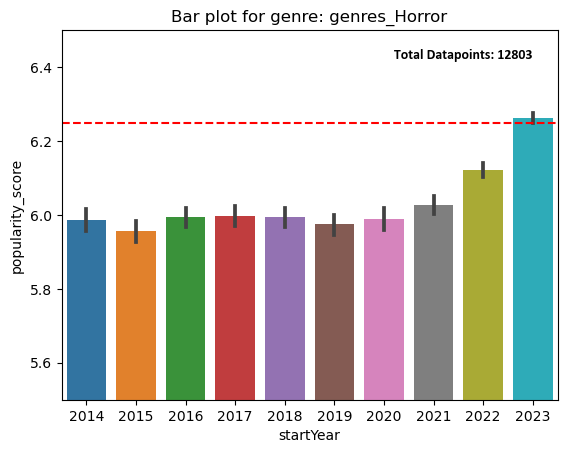

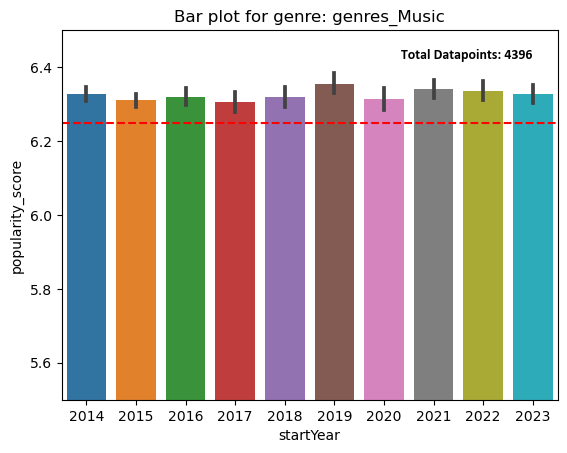

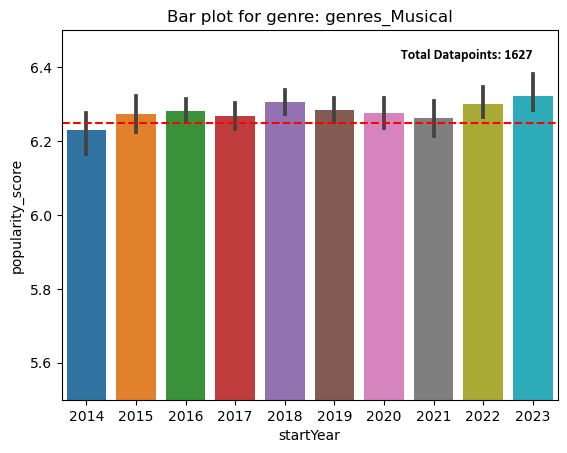

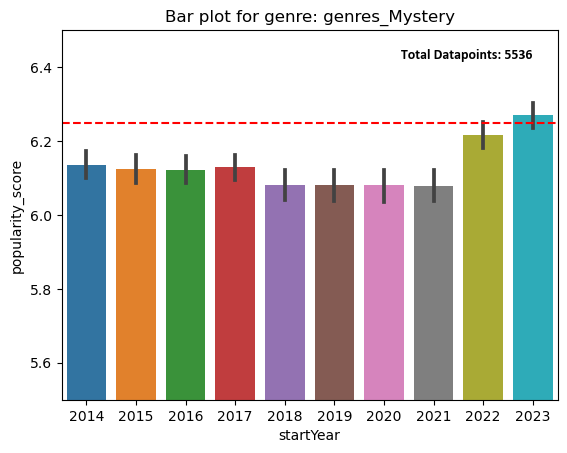

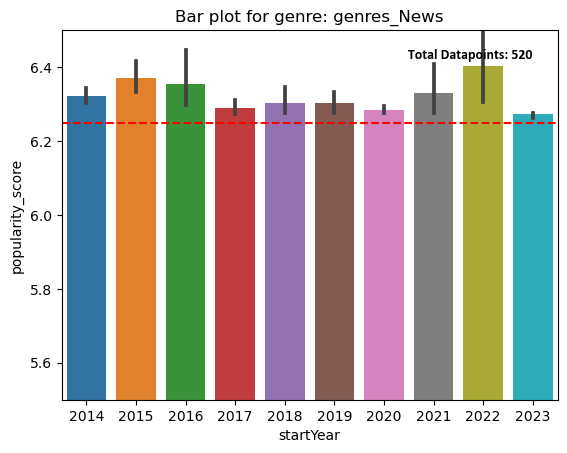

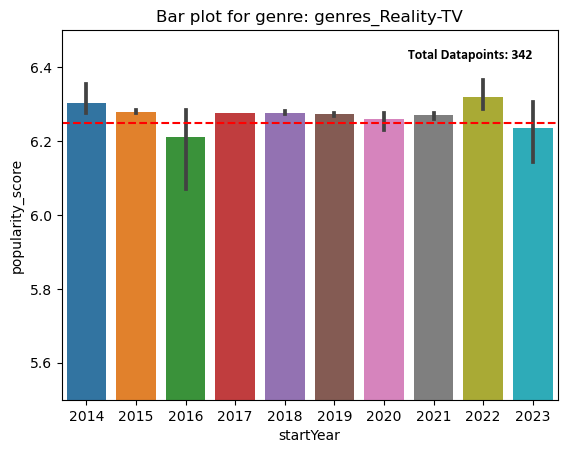

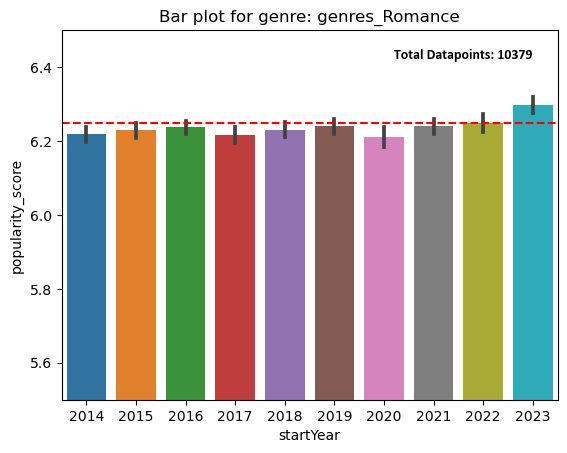

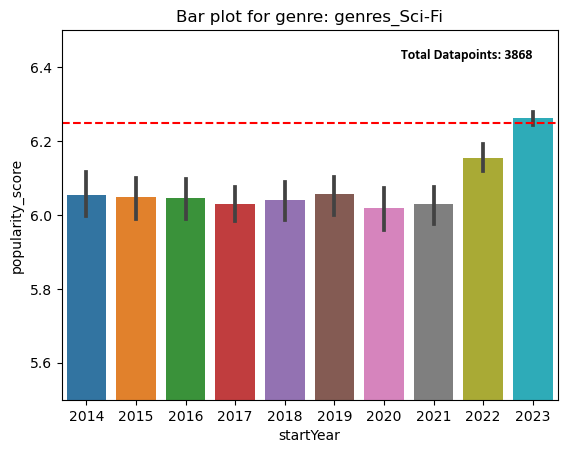

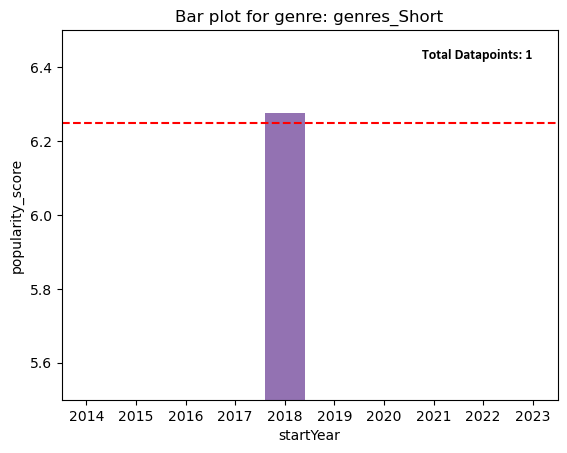

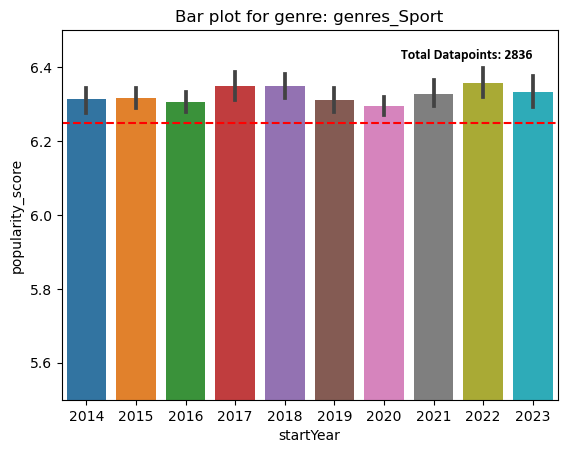

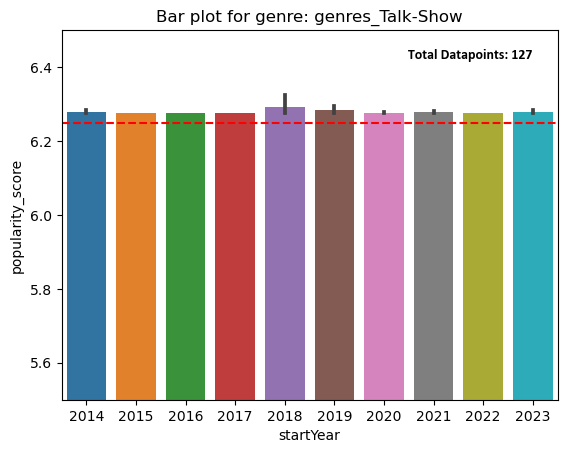

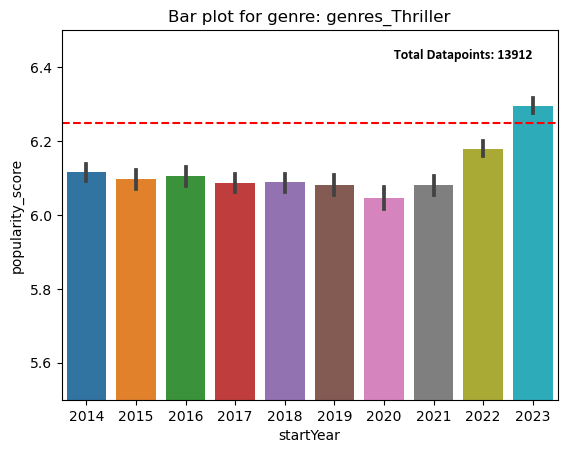

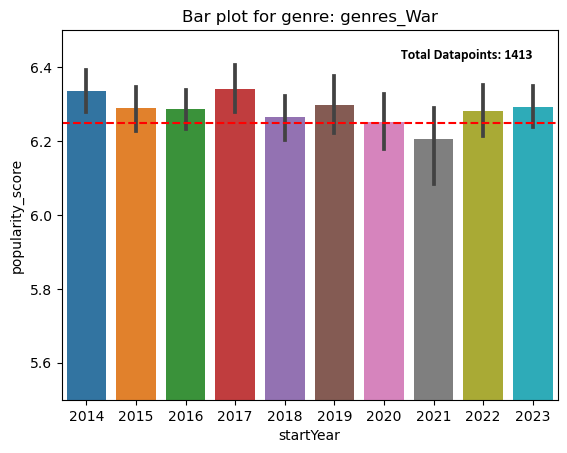

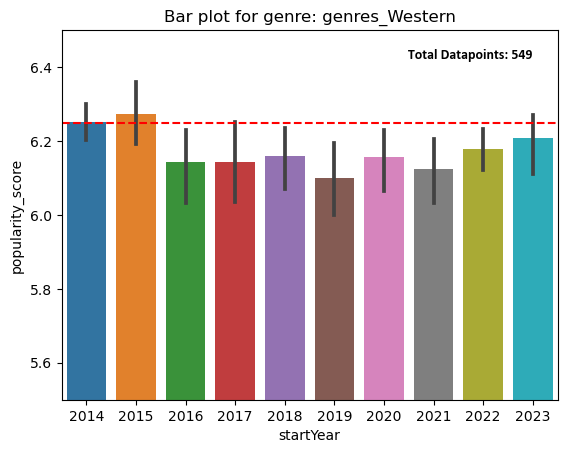

<Figure size 640x480 with 0 Axes>

In [73]:
for genre in genre_cols:
    genre_df = df[df[genre]==1]
    sns.barplot(data=genre_df, x='startYear', y='popularity_score')
    plt.title(f'Bar plot for genre: {genre}')
    plt.text(0.95, 0.95, f'Total Datapoints: {len(genre_df)}', transform=plt.gca().transAxes,
             horizontalalignment='right', verticalalignment='top',
             fontsize=10, fontweight='bold', color='black', fontname='Calibri')
    plt.axhline(y=df['popularity_score'].mean(),color='red', linestyle='--', label='Overall Mean')
    plt.ylim(5.5,6.5)
    plt.show()


plt.tight_layout()
plt.show()

Some genres have seen an increase in popularity in the past few years, such as: 
- Action
- Comedy
- Crime
- Family
- Horror
- Mystery
- Sci-Fi
- Thriller

Overall, genres such as animation, biography, documentaries, history, music and sports have consistently been popular across the board. However, genres such as mystery, romance, horror and fantasy has been seeing a gradual increase in popularity recently.

---

In [74]:
#Removing the following 4 genres due to lack of data
genre_cols.remove('genres_Adult')
genre_cols.remove('genres_Short')
genre_cols.remove('genres_Talk-Show')
genre_cols.remove('genres_Game-Show')

In [75]:
for genre in genre_cols:
    print(f"{genre} has {revenue.groupby(genre).size()[1]} datapoints")
    print("="*80)

genres_Action has 2879 datapoints
genres_Adventure has 1837 datapoints
genres_Animation has 1175 datapoints
genres_Biography has 1269 datapoints
genres_Comedy has 6776 datapoints
genres_Crime has 1958 datapoints
genres_Documentary has 2861 datapoints
genres_Drama has 10449 datapoints
genres_Family has 1235 datapoints
genres_Fantasy has 896 datapoints
genres_History has 928 datapoints
genres_Horror has 1739 datapoints
genres_Music has 680 datapoints
genres_Musical has 209 datapoints
genres_Mystery has 1174 datapoints
genres_News has 19 datapoints
genres_Reality-TV has 2 datapoints
genres_Romance has 2476 datapoints
genres_Sci-Fi has 532 datapoints
genres_Sport has 406 datapoints
genres_Thriller has 2522 datapoints
genres_War has 310 datapoints
genres_Western has 68 datapoints


In [76]:
revenue

tconst titleType                 primaryTitle  \
1       tt0013274     movie  Istoriya grazhdanskoy voyny   
5       tt0100275     movie     The Wandering Soap Opera   
27      tt0293429     movie                Mortal Kombat   
32      tt0315642     movie                        Wazir   
37      tt0331314     movie              Bunyan and Babe   
...           ...       ...                          ...   
162872  tt9914942     movie       Life Without Sara Amat   
162873  tt9914972     movie               Blind Ambition   
162876  tt9915872     movie         The Last White Witch   
162883  tt9916362     movie                        Coven   
162884  tt9916428     movie          The Secret of China   

                       originalTitle  isAdult  startYear  runtimeMinutes  \
1        Istoriya grazhdanskoy voyny        0       2021       94.000000   
5              La Telenovela Errante        0       2017       80.000000   
27                     Mortal Kombat        0       2021      110.000000   
32                             Wazir        0       2016      103.000000   
37                   Bunyan and Babe        0       2017       84.000000   
...                              ...      ...        ...             ...   
162872    La vida sense la Sara Amat        0       2019       74.000000   
162873                Blind Ambition        0       2021       96.000000   
162876     My Girlfriend is a Wizard        0       2019       97.000000   
162883                      Akelarre        0       2020       92.000000   
162884  Hong xing zhao yao Zhong guo        0       2019       97.684611   

                                                   nconst  \
1                          nm0412842;nm0895048;nm13054604   
5       nm0005948;nm0016013;nm0728971;nm0721280;nm1415...   
27      nm0864880;nm1167985;nm2537621;nm0493257;nm3029...   
32      nm3871075;nm0000821;nm1027719;nm2390814;nm1303...   
37      nm1356349;nm0000422;nm0289344;nm0001288;nm2259...   
...                                                   ...   
162872  nm0739828;nm10823679;nm10814833;nm1412926;nm34...   
162873  nm5293094;nm0743916;nm5292318;nm6760227;nm4407...   
162876            nm0755725;nm4392634;nm8063415;nm2507310   
162883  nm5813626;nm3766704;nm0107165;nm0266723;nm1067...   
162884  nm3611859;nm9445072;nm8594703;nm0422639;nm0910...   

                                                 category  \
1                              director;director;producer   
5       composer;actor;actress;actor;actress;director;...   
27      writer;actor;actress;actor;actor;director;writ...   
32      writer;actor;actor;actress;actor;director;writ...   
37      composer;actor;actor;actor;actor;director;writ...   
...                                                   ...   
162872  editor;actor;actress;actress;actress;director;...   
162873  director;director;writer;writer;composer;cinem...   
162876                    actress;actress;director;writer   
162883  composer;actress;actor;actor;actress;director;...   
162884     actor;actor;actor;actress;director;actor;actor   

                                                      job  \
1                                          \N;\N;producer   
5       \N;\N;\N;\N;\N;original director;completion di...   
27      based on the videogame created by;\N;\N;\N;\N;...   
32      dialogue;\N;\N;\N;\N;\N;story;screenplay;scree...   
37      \N;\N;\N;\N;\N;\N;screenplay by;screenplay by;...   
...                                                   ...   
162872                   \N;\N;\N;\N;\N;\N;\N;novel;\N;\N   
162873                                  \N;\N;\N;\N;\N;\N   
162876                                    \N;\N;\N;writer   
162883  \N;\N;\N;\N;\N;\N;screenplay by;executive prod...   
162884                               \N;\N;\N;\N;\N;\N;\N   

                                               characters  \
1                                                \N;\N;\N   
5       \N;["Belisario - Homero - Mateo"];["Waitress -..

In [77]:
revenues_by_genre = []

for genre in genre_cols:
    revenues_by_genre.append(revenue.groupby(genre)['adjusted_revenue'].mean()[1])

revenues_by_genre_df = pd.DataFrame({'Genre':genre_cols,'Mean Revenue per film':revenues_by_genre})


In [78]:
revenues_by_genre_df.sort_values('Mean Revenue per film',ascending=False)

Genre  Mean Revenue per film
18       genres_Sci-Fi           7.386667e+07
1     genres_Adventure           7.296151e+07
0        genres_Action           4.563837e+07
9       genres_Fantasy           3.561325e+07
2     genres_Animation           3.421159e+07
5         genres_Crime           1.385064e+07
8        genres_Family           1.344242e+07
4        genres_Comedy           1.289054e+07
20     genres_Thriller           1.241355e+07
14      genres_Mystery           1.118302e+07
3     genres_Biography           9.163531e+06
11       genres_Horror           8.280129e+06
10      genres_History           7.895235e+06
7         genres_Drama           7.856185e+06
17      genres_Romance           7.085622e+06
12        genres_Music           6.758027e+06
21          genres_War           6.513397e+06
13      genres_Musical           6.051935e+06
19        genres_Sport           5.466966e+06
22      genres_Western           2.644586e+06
16   genres_Reality-TV           8.568493e+05
6   genres_Documentary           4.604328e+05
15         genres_News           4.218660e+05

The highest earning genres are adventure, sci-fi, action, fantasy and animation

In [79]:
revenue.groupby([genre, 'startYear'])['adjusted_revenue'].mean()

genres_Western  startYear
0               2014         1.739188e+07
                2015         1.556992e+07
                2016         1.383061e+07
                2017         1.305269e+07
                2018         1.239641e+07
                2019         1.209236e+07
                2020         4.729240e+06
                2021         8.331076e+06
                2022         7.175415e+06
                2023         9.655822e+06
1               2014         1.170581e+07
                2015         4.672251e+06
                2016         3.165870e+04
                2017         3.990221e+06
                2018         1.281178e+06
                2019         2.699183e+05
                2020         7.234440e+04
                2021         9.245054e+04
                2022         2.873815e+05
                2023         2.797651e+04
Name: adjusted_revenue, dtype: float64

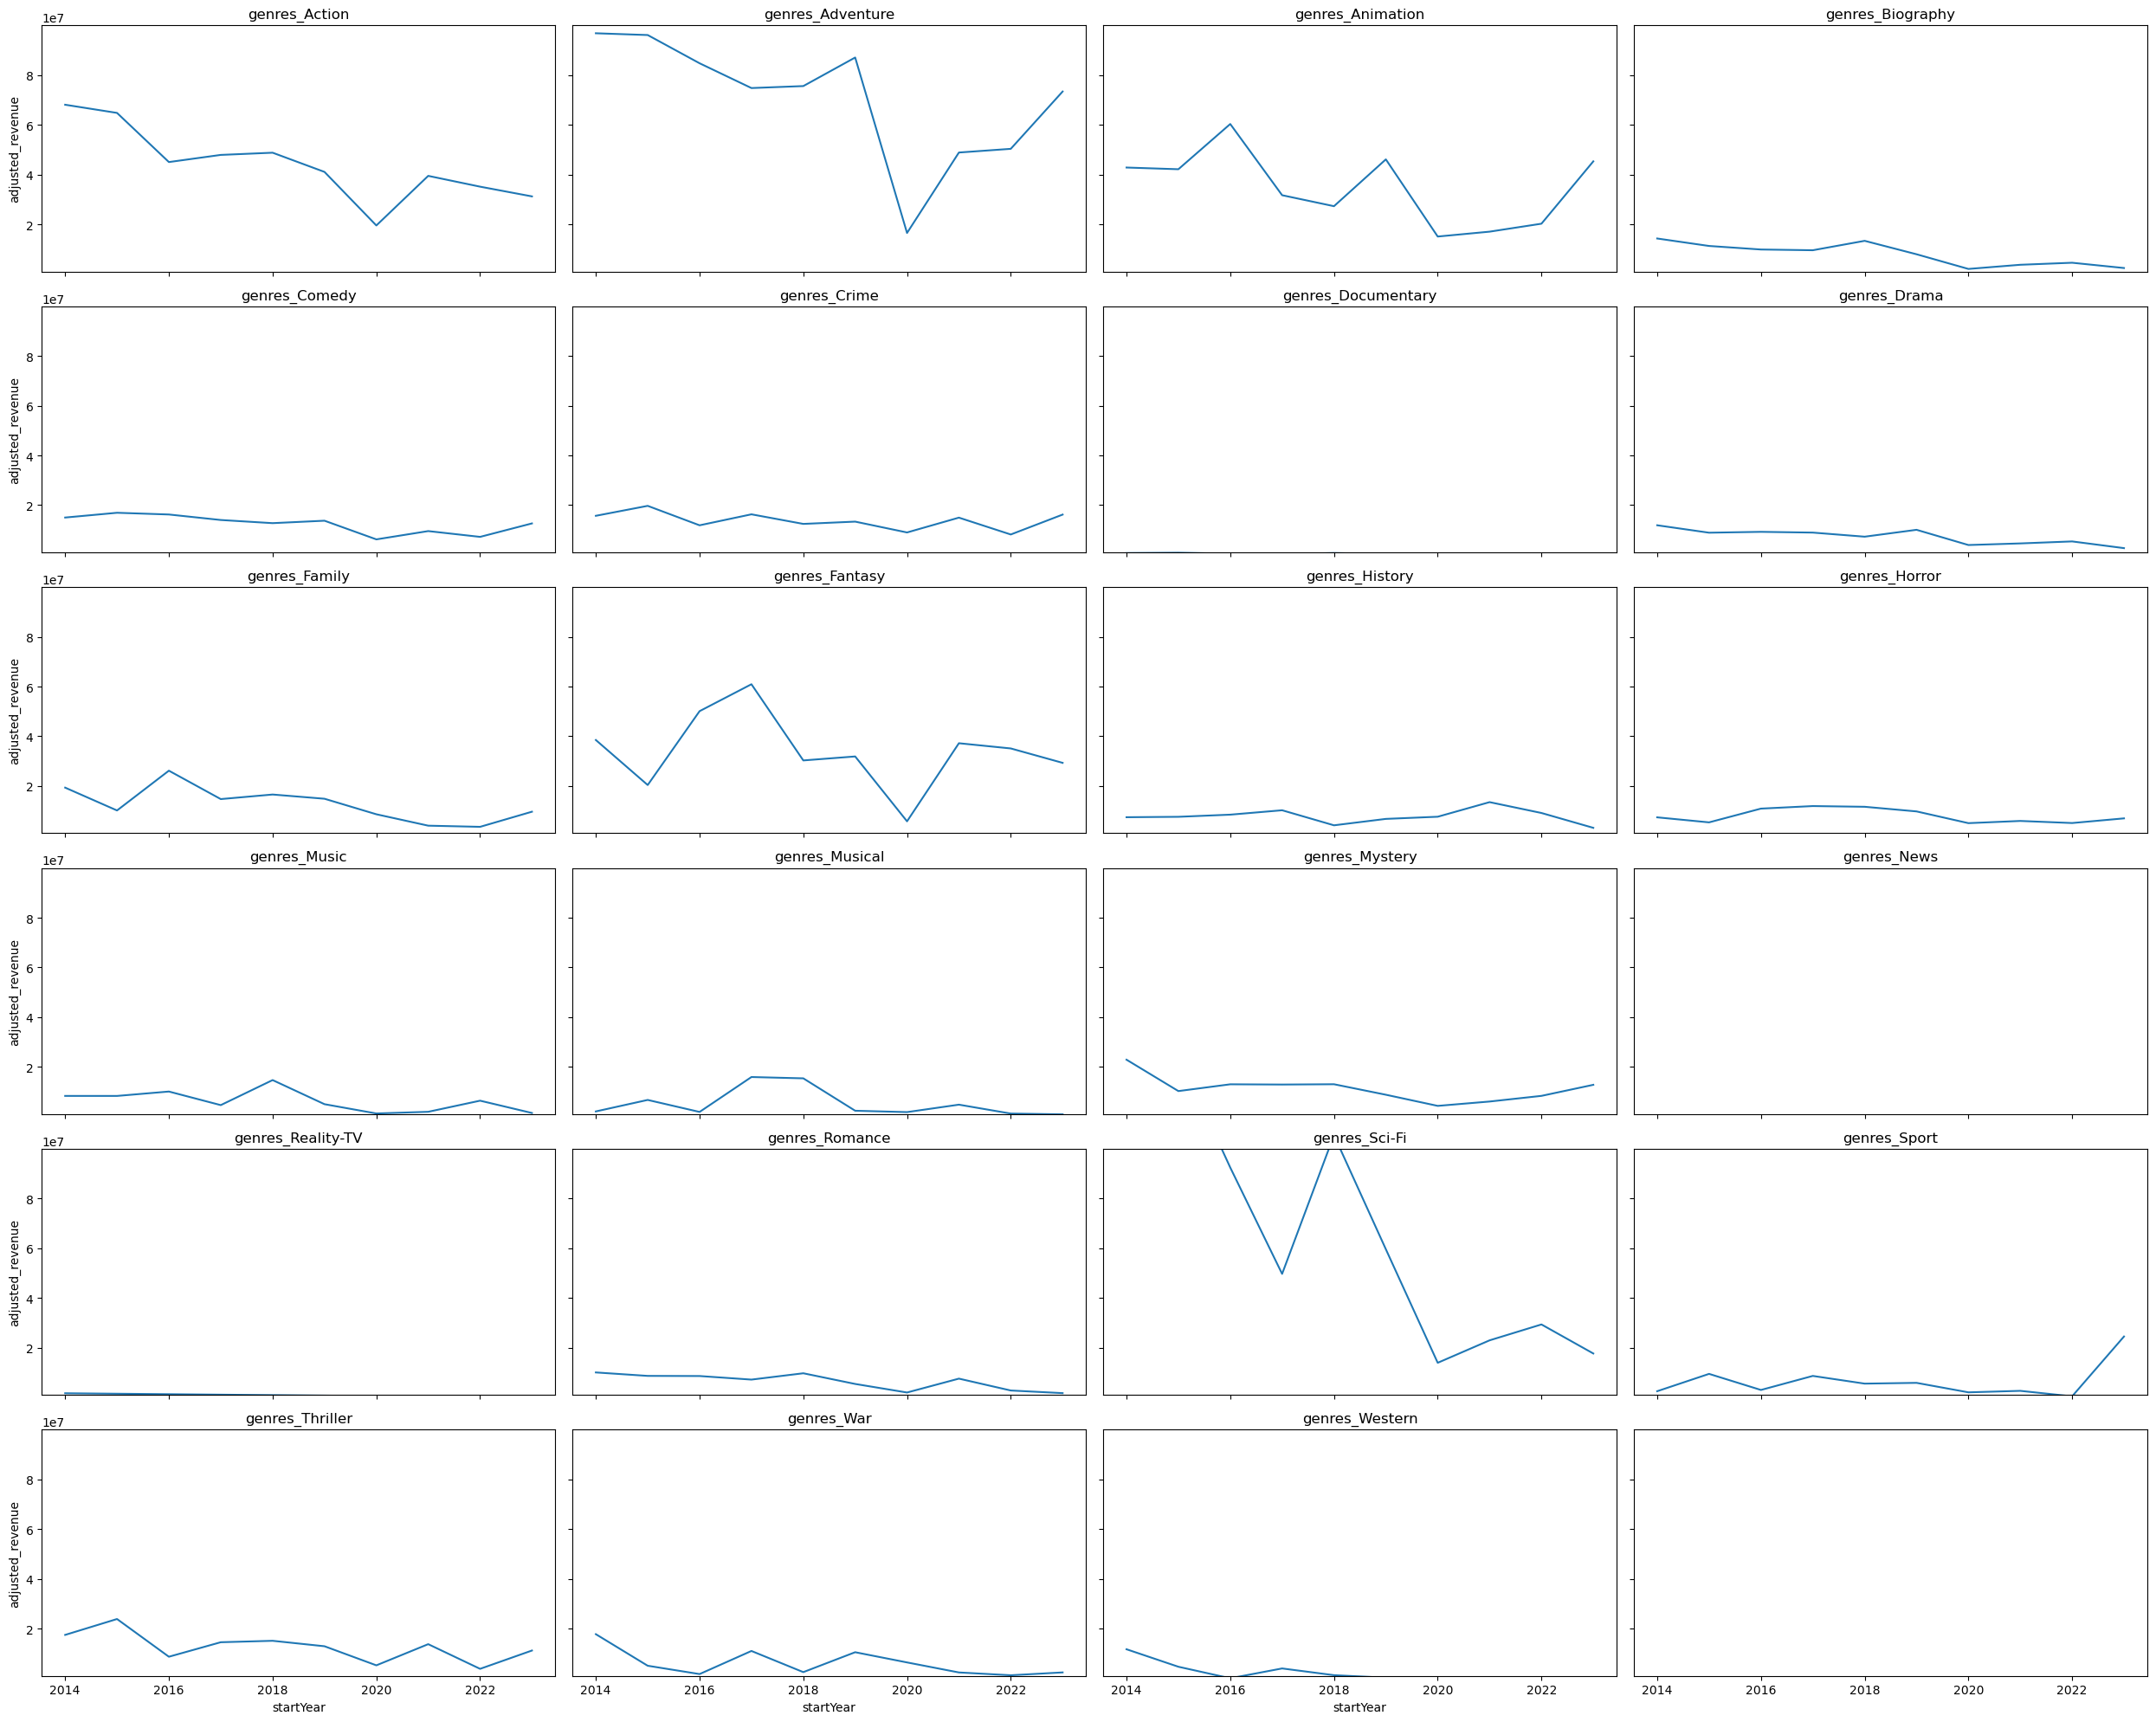

In [80]:
# Calculate the number of rows and columns for the subplots
num_rows = 6
num_cols = 4
total_plots = num_rows * num_cols

# Create a figure and axis for the subplots, and share both x and y axis
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 20), sharex=True, sharey=True)

# Loop through each genre and create the line plot on the corresponding subplot
for index, genre in enumerate(genre_cols):
    gb = revenue.groupby([genre, 'startYear'])['adjusted_revenue'].mean().reset_index()
    gb_genre = gb.loc[gb[genre] == 1]
    
    # Calculate the position of the subplot in the grid
    row = index // num_cols
    col = index % num_cols
    
    # Plot the line graph on the corresponding subplot
    sns.lineplot(data=gb_genre, x='startYear', y='adjusted_revenue', ax=ax[row, col])
    
    # Set the title of each subplot as the genre name
    ax[row, col].set_title(genre)
    
    # Set the y-axis limits
    ax[row, col].set_ylim(1000000, 99999999)
    
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In recent times, adventure and animation films have been yielding high average revenues per film. Genres like sci-fi is starting to taper off in revenue.

---

In [81]:
# #Analyzing which directors frequently produces high revenue/popular movies
# revenue['directors'] = revenue['directors'].str.split(',')

# #Binning movies according to 25th, 50th and 75th percentiles using qcut
# revenue['revenue_category'] = pd.qcut(x=revenue['adjusted_revenue'], q=[0, 0.25, 0.5, 0.75, 1], labels = ['low', 'average', 'high', 'very_high'])

# high_revenue_movies = revenue[revenue['revenue_category']=='very_high']

# directors_exploded = high_revenue_movies.explode('directors')

# director_counts = directors_exploded['directors'].value_counts()
# high_revenue_directors = director_counts[director_counts>5]




# #Getting titles with high revenue
# high_revenue_directors_full_df = directors_exploded[directors_exploded['directors'].isin(high_revenue_directors.index)].merge(name_basics, how='left', left_on='directors', right_on='nconst')
# high_revenue_directors_full_df = high_revenue_directors_full_df[['tconst','primaryTitle',\
#                                                                 'isAdult','startYear','runtimeMinutes',\
#                                                                 'directors','averageRating','numVotes',\
#                                                                 'region_count','adjusted_revenue','primaryName',\
#                                                                 'primaryProfession','knownForTitles']]

In [82]:
# vhigh_revenue_df.to_csv('../data/vhigh_revenue_df.csv')

In [83]:
#Due to the large size of the name_basics dataset, I saved the results of the groupby object and pre-loaded it here
vhigh_revenue_df = pd.read_csv('../data/directors_high_revenue.csv')

In [84]:
vhigh_revenue_df

primaryName  adjusted_revenue  adjusted_revenue_in_millions
0        Ridley Scott        1482580681                   1482.580681
1         Guy Ritchie        1378853748                   1378.853748
2    Steven Spielberg        1341571418                   1341.571418
3     Kenneth Branagh        1137248222                   1137.248222
4      Clint Eastwood        1103354349                   1103.354349
5  Jaume Collet-Serra        1003440478                   1003.440478

Directors like Dante Lam, Kenneth Branagh, Ridley Scott, Guy Ritchie and Steven Spielberg produced movies that earn on average at $10m in revenue

---

## Data Preparation


1. Select data: Determine which data sets will be used and document reasons for inclusion/exclusion.
2. Clean data: Often this is the lengthiest task. Without it, you’ll likely fall victim to garbage-in, garbage-out. A common practice during this task is to correct, impute, or remove erroneous values.
3. Construct data: Derive new attributes that will be helpful. For example, derive someone’s body mass index from height and weight fields.
4. Integrate data: Create new data sets by combining data from multiple sources.
5. Format data: Re-format data as necessary. For example, you might convert string values that store numbers to numeric values so that you can perform mathematical operations.

##### Preparing dataset 1 - using rating scraped from imdb website

In [85]:
missing_vals_no = ratings.isna().sum().sum()
total_values = ratings.shape[0]*ratings.shape[1]

print(f"Total missing values:{missing_vals_no}")
print(f"Total values:{total_values}")
print(f"Sparsity: {missing_vals_no/total_values}")


Total missing values:181517832
Total values:181580760
Sparsity: 0.9996534434595383


In [86]:
ratings = ratings.reset_index()

In [87]:
#Preparing data for keras
ratings_melted = ratings.melt(id_vars = ['tconst'], var_name = 'userId', value_name='rating')

#Dropping nil rating columns
ratings_melted.dropna(subset=['rating'],inplace=True)

#Creating movie to index mappings
movie_id_map = {movie_id: idx for idx, movie_id in enumerate(ratings_melted['tconst'].unique())}
user_id_map = {user_id:idx for idx, user_id in enumerate(ratings_melted['userId'].unique())}


#Mapping movie id and users id
ratings_melted['user_id'] = ratings_melted['userId'].map(user_id_map)
ratings_melted['movie_id'] = ratings_melted['tconst'].map(movie_id_map)

ratings_melted['rating'] = ratings_melted['rating'].astype('float')



#Calculating N and M dims of matrix

N = ratings_melted['user_id'].max()+1
M = ratings_melted['movie_id'].max()+1


#train-test_split with test set = 20%

ratings_melted = shuffle(ratings_melted)
cutoff = int(0.8*len(ratings_melted))
df_train = ratings_melted.iloc[:cutoff]
df_test = ratings_melted.iloc[cutoff:]


In [88]:
ratings_melted

tconst       userId  rating  user_id  movie_id
58847972   tt15292474   ur82002563     1.0     1335      7066
50744452    tt2718440   ur43053352     7.0     1151      2114
50772680   tt10196368    ur2294195     7.0     1152         5
29480336    tt8337320  ur117205576     7.0      668      4855
68279948   tt15474916   ur25741154     4.0     1549       454
...               ...          ...     ...      ...       ...
101024667  tt14550642  ur109917798     1.0     2292      5118
19392141    tt0369610   ur62434612     5.0      440      1161
22823130    tt7653254   ur67902729     9.0      517        90
159904592  tt13560574   ur21089513     5.0     3628       577
13850646   tt16428256   ur25790270     7.0      314      2307

[62928 rows x 5 columns]

---

## Modelling

1. Select modeling techniques: Determine which algorithms to try (e.g. regression, neural net).
2. Generate test design: Pending your modeling approach, you might need to split the data into training, test, and validation sets.
3. Build model: As glamorous as this might sound, this might just be executing a few lines of code like “reg = LinearRegression().fit(X, y)”.
4. Assess model: Generally, multiple models are competing against each other, and the data scientist needs to interpret the model results based on domain knowledge, the pre-defined success criteria, and the test design.

##### Building Recommender Model 1 using keras

In [89]:
#Initializing variables

K = 10
mu = df_train['rating'].mean()
epochs=100
reg = 0.1

# keras model
u = Input(shape=(1,))
m = Input(shape=(1,))
u_embedding = Embedding(N, K, embeddings_regularizer=l2(reg))(u) # (N, 1, K)
m_embedding = Embedding(M, K, embeddings_regularizer=l2(reg))(m) # (N, 1, K)
u_embedding = Flatten()(u_embedding) # (N, K)
m_embedding = Flatten()(m_embedding) # (N, K)
x = Concatenate()([u_embedding, m_embedding]) # (N, 2K)

# the neural network
x = Dense(1000)(x)
# x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(500)(x)
x = Dropout(0.5)(x)
x = Dense(250)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(1)(x)

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model = Model(inputs=[u, m], outputs=x)
model.compile(
  loss='mse',
  optimizer='adam',
  # optimizer=Adam(lr=0.01),
  # optimizer=SGD(lr=0.08, momentum=0.9),
  metrics=['mse'],
)

In [90]:
r = model.fit(
  x=[df_train.user_id.values, df_train.movie_id.values],
  y=df_train.rating.values - mu,
  epochs=epochs,
  callbacks = [early_stopping],
  batch_size=128,
  validation_data=(
    [df_test.user_id.values, df_test.movie_id.values],
    df_test.rating.values - mu
  )
)

Epoch 1/100
394/394 [==============================] - 8s 12ms/step - loss: 5.4641 - mse: 4.2881 - val_loss: 5.4406 - val_mse: 4.6574
Epoch 2/100
394/394 [==============================] - 4s 11ms/step - loss: 4.3085 - mse: 3.5689 - val_loss: 4.4691 - val_mse: 3.7397
Epoch 3/100
394/394 [==============================] - 4s 11ms/step - loss: 4.0896 - mse: 3.3713 - val_loss: 4.3502 - val_mse: 3.6410
Epoch 4/100
394/394 [==============================] - 5s 13ms/step - loss: 3.8917 - mse: 3.1805 - val_loss: 4.4065 - val_mse: 3.6769
Epoch 5/100
394/394 [==============================] - 4s 11ms/step - loss: 3.7728 - mse: 3.0609 - val_loss: 4.3725 - val_mse: 3.6498
Epoch 6/100
394/394 [==============================] - 4s 11ms/step - loss: 3.7240 - mse: 2.9852 - val_loss: 4.4315 - val_mse: 3.6490
Epoch 7/100
394/394 [==============================] - 4s 11ms/step - loss: 3.6574 - mse: 2.9131 - val_loss: 4.4687 - val_mse: 3.7181
Epoch 8/100
394/394 [==============================] - 5s 13ms

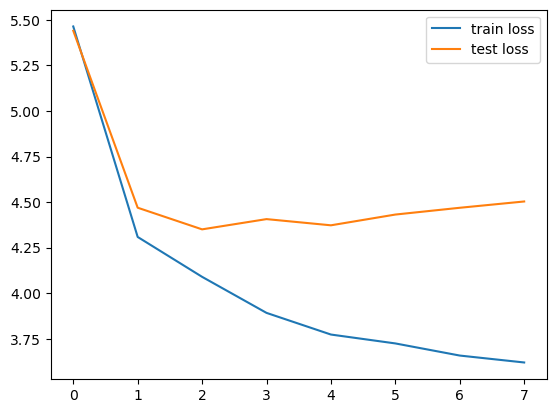

In [91]:
# plot losses
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="test loss")
plt.legend()
plt.show()

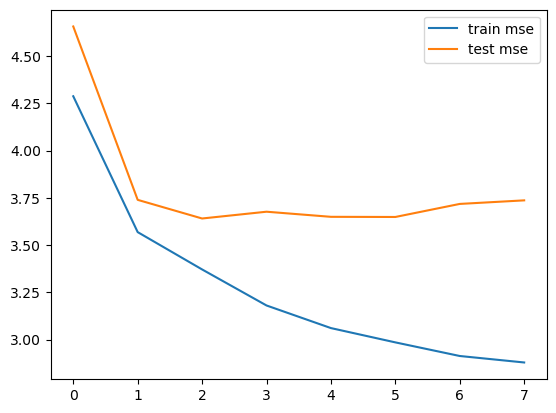

In [92]:
# plot mse
plt.plot(r.history['mse'], label="train mse")
plt.plot(r.history['val_mse'], label="test mse")
plt.legend()
plt.show()

In [93]:
ratings

tconst ur0011762 ur3564718 ur0806494 ur2860723 ur20393720 ur1888886  \
0      tt0069049         7         8         8         5          9         9   
1      tt0109128      None      None      None      None       None      None   
2      tt0120589      None      None      None      None       None      None   
3      tt0137204      None      None      None      None       None      None   
4      tt0137818      None      None      None      None       None      None   
...          ...       ...       ...       ...       ...        ...       ...   
44068  tt9914972      None      None      None      None       None      None   
44069  tt9916190      None      None      None      None       None      None   
44070  tt9916270      None      None      None      None       None      None   
44071  tt9916362      None      None      None      None       None      None   
44072  tt9916428      None      None      None      None       None      None   

      ur36246296 ur5876717 ur12643360 ur34196744 ur89706886 ur60689236  \
0              6         6          3          8          7          5   
1           None      None       None       None       None       None   
2           None      None       None       None       None       None   
3           None      None       None       None       None       None   
4           None      None       None       None       None       None   
...          ...       ...        ...        ...        ...        ...   
44068       None      None       None       None       None       None   
44069       None      None       None       None       None       None   
44070       None      None       None       None       None       None   
44071       None      None       None       None       None       None   
44072       None      None       None       None       None       None   

      ur84769582 ur65103587 ur27550947 ur16347457 ur0351766 ur16126010  \
0              9          9          6          5         4          4   
1           None       None       None       None      None       None   
2           None       None       None       None      None       None   
3           None       None       None       None      None       None   
4           None       None       None       None      None       None   
...          ...        ...        ...        ...       ...        ...   
44068       None       None       None       None      None       None   
44069       None       None       None       None      None       None   
44070       None       None       None       None      None       None   
44071       None       None       None       None      None       None   
44072       None       None       None       None      None       None   

      ur31051710 ur0808507 ur34226907 ur3942202 ur85067217 ur128765215  \
0              2      None       None      None       None        None   
1           None         9       None      None       None        None   
2           None      None          8      None       None        None   
3           None      None       None         9          9        None   
4           None      None       None      None       None           1   
...          ...       ...        ...       ...        ...         ...   
44068       None      None       None      None       None        None   
44069       None      None       None      None       None        None   
44070       None      None       None      None       None        None   
44071       None      None       None      None       None        None   
44072       None      None       None      None       None        None   

      ur2334345 ur84739992 ur57048991 ur0633574 ur20006809 ur75127970  \
0          None       None       None      None       None       None   
1          None       None       None      None       None       None   
2          None       None       None      None       None       None   
3          None       None       None      None       None       None   
4    

In [94]:
ratings_melted

tconst       userId  rating  user_id  movie_id
58847972   tt15292474   ur82002563     1.0     1335      7066
50744452    tt2718440   ur43053352     7.0     1151      2114
50772680   tt10196368    ur2294195     7.0     1152         5
29480336    tt8337320  ur117205576     7.0      668      4855
68279948   tt15474916   ur25741154     4.0     1549       454
...               ...          ...     ...      ...       ...
101024667  tt14550642  ur109917798     1.0     2292      5118
19392141    tt0369610   ur62434612     5.0      440      1161
22823130    tt7653254   ur67902729     9.0      517        90
159904592  tt13560574   ur21089513     5.0     3628       577
13850646   tt16428256   ur25790270     7.0      314      2307

[62928 rows x 5 columns]

In [95]:
#Testing out prediction for user ur0011762 (or user 0) for movie tt0109128 (movie_id 474)

user_id_input = np.array([0])
movie_id_input = np.array([474])

prediction = model.predict([user_id_input, movie_id_input])
predicted_rating = np.round(prediction + mu).clip(1,10)
print(f"Predicted rating for user ur0011762 and movie tt0109128 is {predicted_rating}")


1/1 [==============================] - 0s 269ms/step
Predicted rating for user ur0011762 and movie tt0109128 is [[7.]]


In [96]:
# # Saving model for use in streamlit app
# model.save('../models/reco_v1.h5')


The model's val mse is quite high at ~3.5. This model is quite inaccurate, possibly due to the extreme sparsity of the dataset (99.94%).

---

## Evaluation

1. Evaluate results: Do the models meet the business success criteria? Which one(s) should we approve for the business?
2. Review process: Review the work accomplished. Was anything overlooked? Were all steps properly executed? Summarize findings and correct anything if needed.
3. Determine next steps: Based on the previous three tasks, determine whether to proceed to deployment, iterate further, or initiate new projects.

---

For reco model 1, due to the lack of data scrapped from the imdb website, we end up with a model with poor accuracy (~3.5 MSE). Hence, this model cannot be used. To proceed, there is a need to either acquire more ratings data, use an alternative dataset, or build a different model. Hence, the Movie Lens 1m dataset was used and a separate model was trained with the exact same steps.


The following shows the model architecture and results of the second (and final) model used:

![](../images/model.jpg)

The model took in 2 inputs - a movie ID and a user ID, and then would make a prediction of the rating the user would give for the movie from a score of 1 to 10. <br>
The overall model had an MSE of 0.94 (ie the prediction will often be +- 1 of the actual rating).

---